# <center> Capstone Project <center>

### <center> Data Dwellers: Finding a Home Through Analytics <center>

<div class="alert alert-block alert-info">
<b>Where should I live?:</b> 

Which U.S. city among my selected options - Raleigh, NC; Seattle, WA; Philadelphia, PA; and Austin, TX - offers the best balance of public transportation, diversity, and affordability for a remote worker seeking a vibrant, walkable, and connected lifestyle?

Things to consider:
- How much each city spends on public transit
- Availability of public transit systems
- Average Commute time
- Racial diversity per city
- Foreign-born population %
- Number of languages spoken
- Median monthly rent
- Median home price
- Average monthly utility and internet costs
- Grocery and transportation prices

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from adjustText import adjust_text

In [6]:
pd.set_option('display.max_columns', None)

# <center> Reading in City Specific Data <center>

## Austin:

<center> City Budget Data <center>

In [10]:
austin_city_budget=pd.read_csv('../data/austin/Austin_Program_Budget_Operating_Budget_Vs_Expense_Raw_Data_20250519.csv')

In [11]:
#Transportation and Public Works
austin_transportation_budget = austin_city_budget[austin_city_budget['DEPARTMENT_NAME'] == 'Transportation and Public Works']

<center> Transportation/ Commuting <center>

In [13]:
austin_access_public_transport=pd.read_csv('../data/austin/austin_strategic_measures_percentage_of_population_access_to_public_transit_service_or_is_within_one_quarter_mile_of_regular_fixed_route_transit_20250519.csv')

In [14]:
austin_travel_time=pd.read_csv('../data/austin/austin_travel_time.csv')
austin_travel_time.columns = ['TRAVEL TIME TO WORK', 
                        'Austin Total Estimate',
                        'Austin Total Margin of Error', 
                       'Austin Male Estimate', 
                       'Austin Male Margin of Error',
                       'Austin Female Estimate',
                        'Austin Female Margin of Error']
austin_means_transport=pd.read_csv('../data/austin/austin_means_transport.csv')
austin_means_transport.columns = ['TRANSPORTATION TO WORK', 
                        'Austin Total Estimate',
                        'Austin Total Margin of Error', 
                       'Austin Male Estimate', 
                       'Austin Male Margin of Error',
                       'Austin Female Estimate',
                        'Austin Female Margin of Error']

<center> Housing / Social Characteristics <center>

In [16]:
austin_housing_chars=pd.read_csv('../data/austin/census_selected_housing_char_austin.csv')

In [17]:
austin_housing_chars.columns = ['Housing Label',
                               'Austin Estimate', 
                               'Austin Margin of Error',
                               'Austin Percent',
                               'Austin Percent Margin of Error']

In [18]:
austin_ancestry=pd.read_csv('../data/austin/austin_ancestry.csv')
austin_ancestry.columns = ['Ancestry',
                               'Austin Estimate', 
                               'Austin Margin of Error',
                               'Austin Percent',
                               'Austin Percent Margin of Error']

In [19]:
austin_language=pd.read_csv('../data/austin/austin_language.csv')
austin_language.columns = ['Language',
                               'Austin Estimate', 
                               'Austin Margin of Error',
                               'Austin Percent',
                               'Austin Percent Margin of Error']

In [20]:
austin_place_birth=pd.read_csv('../data/austin/austin_place_birth.csv')
austin_place_birth.columns = ['Place of Birth',
                               'Austin Estimate', 
                               'Austin Margin of Error',
                               'Austin Percent',
                               'Austin Percent Margin of Error']

In [21]:
austin_region_birth=pd.read_csv('../data/austin/austin_region.csv')
austin_region_birth.columns = ['Region of Birth',
                               'Austin Estimate', 
                               'Austin Margin of Error',
                               'Austin Percent',
                               'Austin Percent Margin of Error']

## Philadelphia

<center> City Budget Data <center>

In [24]:
philly_pt_budget=pd.read_csv('../data/philadelphia/operating_budget_fy_2019.csv')

In [25]:
philly_septa_budget=pd.read_csv('../data/philadelphia/septa_philly_budget.csv')

<center> Transportation/ Commuting <center> 

In [27]:
philly_transportation_budget = philly_septa_budget[philly_septa_budget['Fiscal_Year']==2024]

In [28]:
philly_means_transport=pd.read_csv('../data/philadelphia/philidephia_means_transport.csv')
philly_means_transport.columns = ['TRANSPORTATION TO WORK', 
                        'Philadelphia Total Estimate',
                        'Philadelphia Total Margin of Error', 
                        'Philadelphia Male Estimate', 
                        'Philadelphia Male Margin of Error',
                        'Philadelphia Female Estimate',
                         'Philadelphia Female Margin of Error']

philly_travel_time=pd.read_csv('../data/philadelphia/philidephia_travel_time.csv')
philly_travel_time.columns = ['TRAVEL TIME TO WORK', 
                        'Philadelphia Total Estimate',
                        'Philadelphia Total Margin of Error', 
                       'Philadelphia Male Estimate', 
                       'Philadelphia Male Margin of Error',
                       'Philadelphia Female Estimate',
                        'Philadelphia Female Margin of Error']

<center> Housing / Social Characteristics <center>

In [30]:
philadelphia_ancestry=pd.read_csv('../data/philadelphia/philadelphia_ancestry.csv')
philadelphia_ancestry.columns = ['Ancestry',
                               'Philadelphia Estimate',
                                'Philadelphia Margin of Error', 
                                'Philadelphia Percent', 
                                'Philadelphia Percent Margin of Error']

In [31]:
philadelphia_language=pd.read_csv('../data/philadelphia/philadelphia_language.csv')
philadelphia_language.columns = ['Language',
                               'Philadelphia Estimate',
                                'Philadelphia Margin of Error', 
                                'Philadelphia Percent', 
                                'Philadelphia Percent Margin of Error']

In [32]:
philadelphia_place_birth=pd.read_csv('../data/philadelphia/philadelphia_place_birth.csv')
philadelphia_place_birth.columns = ['Place of Birth',
                                   'Philadelphia Estimate',
                                    'Philadelphia Margin of Error', 
                                    'Philadelphia Percent', 
                                    'Philadelphia Percent Margin of Error']

In [33]:
philadelphia_region_birth=pd.read_csv('../data/philadelphia/philadelphia_region.csv')
philadelphia_region_birth.columns = ['Region of Birth',
                               'Philadelphia Estimate',
                                'Philadelphia Margin of Error', 
                                'Philadelphia Percent', 
                                'Philadelphia Percent Margin of Error']

In [34]:
philly_housing_chars=pd.read_csv('../data/philadelphia/census_selected_housing_char_philly.csv')

In [35]:
philly_housing_chars.columns = philly_housing_chars.iloc[0]
philly_housing_chars = philly_housing_chars.iloc[1:].reset_index(drop=True)

In [36]:
philly_housing_chars.columns = ['Housing Label', 
                        'Philadelphia Estimate',
                        'Philadelphia Margin of Error', 
                        'Philadelphia Percent', 
                        'Philadelphia Percent Margin of Error']

## Raleigh

<center> City Budget Data <center>

In [39]:
raleigh_budget=pd.read_csv('../data/raleigh/raleigh_adopted_expense_budget.csv')

In [40]:
raleigh_cap_projects=pd.read_csv('../data/raleigh/raliegh_adopted_capital_projects.csv')

<center> Transportation/ Commuting <center> 

In [42]:
raleigh_transportation_budget = raleigh_budget[raleigh_budget['Division'] =='Transportation']

In [43]:
raleigh_travel_time=pd.read_csv('../data/raleigh/raleigh_travel_time.csv')
raleigh_travel_time.columns = ['TRAVEL TIME TO WORK', 
                        'Raleigh Total Estimate',
                        'Raleigh Total Margin of Error', 
                       'Raleigh Male Estimate', 
                       'Raleigh Male Margin of Error',
                       'Raleigh Female Estimate',
                        'Raleigh Female Margin of Error']

raleigh_means_transport=pd.read_csv('../data/raleigh/raleigh_means_transport.csv')
raleigh_means_transport.columns = ['TRANSPORTATION TO WORK', 
                        'Raleigh Total Estimate',
                        'Raleigh Total Margin of Error', 
                       'Raleigh Male Estimate', 
                       'Raleigh Male Margin of Error',
                       'Raleigh Female Estimate',
                        'Raleigh Female Margin of Error']

<center> Housing / Social Characteristics <center>

In [45]:
raleigh_ancestry=pd.read_csv('../data/raleigh/raleigh_ancestry.csv')
raleigh_ancestry.columns = ['Ancestry',
                              'Raleigh Estimate',
                                'Raleigh Margin of Error', 
                                'Raleigh Percent', 
                                'Raleigh Percent Margin of Error']

In [46]:
raleigh_language=pd.read_csv('../data/raleigh/raleigh_language.csv')
raleigh_language.columns = ['Language',
                              'Raleigh Estimate',
                                'Raleigh Margin of Error', 
                                'Raleigh Percent', 
                                'Raleigh Percent Margin of Error']

In [47]:
raleigh_place_birth=pd.read_csv('../data/raleigh/raleigh_place_birth.csv')
raleigh_place_birth.columns = ['Place of Birth',
                                'Raleigh Estimate',
                                'Raleigh Margin of Error', 
                                'Raleigh Percent', 
                                'Raleigh Percent Margin of Error']

In [48]:
raleigh_region_birth=pd.read_csv('../data/raleigh/raleigh_region.csv')
raleigh_region_birth.columns = ['Region of Birth',
                               'Raleigh Estimate',
                                'Raleigh Margin of Error', 
                                'Raleigh Percent', 
                                'Raleigh Percent Margin of Error']

In [49]:
raleigh_housing_chars=pd.read_csv('../data/raleigh/census_selected_housing_char_raliegh.csv')

In [50]:
raleigh_housing_chars.columns =raleigh_housing_chars.iloc[0]
raleigh_housing_chars = raleigh_housing_chars.iloc[1:].reset_index(drop=True)

In [51]:
raleigh_housing_chars.columns = ['Housing Label', 
                        'Raleigh Estimate',
                        'Raleigh Margin of Error', 
                        'Raleigh Percent', 
                        'Raleigh Percent Margin of Error']

## Seattle

<center> City Budget Data <center>

In [54]:
seattle_cap_projects=pd.read_csv('../data/seattle/seatle_open_budget_capital_projects_details_20250518.csv')

In [55]:
seattle_budget=pd.read_csv('../data/seattle/City_of_Seattle_Operating_Budget_20250518.csv')

<center> Transportation/ Commuting <center> 

In [57]:
seattle_transportation_budget= seattle_budget[(seattle_budget['Department']=='Seattle Department of Transportation') &
                                             (seattle_budget['Fiscal Year']==2025)].reset_index()
seattle_transportation_budget = seattle_transportation_budget.drop('index', axis=1)

In [58]:
seattle_travel_time=pd.read_csv('../data/seattle/seattle_travel_time.csv')
seattle_travel_time.columns = ['TRAVEL TIME TO WORK', 
                        'Seattle Total Estimate',
                        'Seattle Total Margin of Error', 
                       'Seattle Male Estimate', 
                       'Seattle Male Margin of Error',
                       'Seattle Female Estimate',
                        'Seattle Female Margin of Error']
seattle_means_transport=pd.read_csv('../data/seattle/seattle_means_transport.csv')
seattle_means_transport.columns = ['TRANSPORTATION TO WORK', 
                        'Seattle Total Estimate',
                        'Seattle Total Margin of Error', 
                       'Seattle Male Estimate', 
                       'Seattle Male Margin of Error',
                       'Seattle Female Estimate',
                        'Seattle Female Margin of Error']

<center> Housing / Social Characteristics <center>

In [60]:
seattle_housing_char=pd.read_csv('../data/seattle/census_selected_housing_char_seattle.csv')

In [61]:
seattle_housing_char.columns =seattle_housing_char.iloc[0]
seattle_housing_char = seattle_housing_char.iloc[1:].reset_index(drop=True)

In [62]:
seattle_housing_char.columns = ['Housing Label', 
                        'Seattle Estimate',
                        'Seattle Margin of Error', 
                        'Seattle Percent', 
                        'Seattle Percent Margin of Error']

In [63]:
seattle_ancestry=pd.read_csv('../data/seattle/seattle_ancestry.csv')
seattle_ancestry.columns = ['Ancestry',
                            'Seattle Estimate',
                            'Seattle Margin of Error', 
                            'Seattle Percent', 
                            'Seattle Percent Margin of Error']

In [64]:
seattle_language=pd.read_csv('../data/seattle/seattle_language.csv')
seattle_language.columns = ['Language',
                            'Seattle Estimate',
                            'Seattle Margin of Error', 
                            'Seattle Percent', 
                            'Seattle Percent Margin of Error']

In [65]:
seattle_place_birth=pd.read_csv('../data/seattle/seattle_place_birth.csv')
seattle_place_birth.columns = ['Place of Birth',
                                'Seattle Estimate',
                                'Seattle Margin of Error', 
                                'Seattle Percent', 
                                'Seattle Percent Margin of Error']

In [66]:
seattle_region_birth=pd.read_csv('../data/seattle/seattle_region_birth.csv')
seattle_region_birth.columns = ['Region of Birth',
                               'Seattle Estimate',
                                'Seattle Margin of Error', 
                                'Seattle Percent', 
                                'Seattle Percent Margin of Error']

# U.S. Data: 

#### Will extract the city specific data from these datasets

<center> Housing Cost <center>

In [70]:
single_fam_home_rent = pd.read_csv('../data/single_family_homes_rent_cost_all_counties.csv')

In [71]:
rent_cost_cities = single_fam_home_rent[(single_fam_home_rent['RegionName']== 'Austin, TX') |
                                        (single_fam_home_rent['RegionName']== 'Seattle, WA') |
                                        (single_fam_home_rent['RegionName']== 'Raleigh, NC') |
                                        (single_fam_home_rent['RegionName']== 'Philadelphia, PA')]

In [72]:
single_fam_home_cost = pd.read_csv('../data/single_family_home_cost_all_counties.csv')

In [73]:
home_cost_cities = single_fam_home_cost[(single_fam_home_cost['RegionName']== 'Travis County') |
                                        (single_fam_home_cost['RegionName']== 'Wake County') |
                                        (single_fam_home_cost['RegionName']== 'King County') |
                                        (single_fam_home_cost['RegionName']== 'Philadelphia County')]


#### City Counties:
- Seattle: King County
- Philadelphia: Philadelphia
- Austin: Travis County
- Raleigh: Wake County

In [75]:
metro_rent=pd.read_csv('../data/metro_mean_rent_all.csv')

In [76]:
metro_rent_cost_cities = metro_rent[(metro_rent['RegionName']== 'Austin, TX') |
                                        (metro_rent['RegionName']== 'Seattle, WA') |
                                        (metro_rent['RegionName']== 'Raleigh, NC') |
                                        (metro_rent['RegionName']== 'Philadelphia, PA')]

In [77]:
metro_house_price=pd.read_csv('../data/metro_mean_sale_price_all.csv')

In [78]:
metro_house_price_cities = metro_house_price[(metro_house_price['RegionName']== 'Austin, TX') |
                                        (metro_house_price['RegionName']== 'Seattle, WA') |
                                        (metro_house_price['RegionName']== 'Raleigh, NC') |
                                        (metro_house_price['RegionName']== 'Philadelphia, PA')]

<center> Transportation/ Commuting <center> 

In [80]:
public_transportation=pd.read_csv('../data/Monthly_Modal_Time_Series_Transportation_All.csv', low_memory=False)

In [81]:
seattle_public_transportation = public_transportation[public_transportation['Primary UZA Name'].str.contains(r"Seattle", na=False)]

In [82]:
austin_public_transportation = public_transportation[public_transportation['Primary UZA Name'].str.contains(r"Austin", na=False)]

In [83]:
raleigh_public_transportation = public_transportation[public_transportation['Primary UZA Name'].str.contains(r"Raleigh", na=False)]

In [84]:
philly_public_transportation = public_transportation[public_transportation['Primary UZA Name'].str.contains(r"Philadelphia", na=False)]

<center>Utility <center>

In [86]:
#Non-IOU = Non-Investor-Owned Utility
noniou_utility_rates = pd.read_csv('../data/non_iou_utlity_rates_zip_openei_all.csv')

In [87]:
noniou_utility_rates_cities = noniou_utility_rates[(noniou_utility_rates['state']== 'TX') |
                                        (noniou_utility_rates['state']== 'NC') |
                                        (noniou_utility_rates['state']== 'WA') |
                                        (noniou_utility_rates['state']== 'PA')]

In [88]:
iou_utility_rates = pd.read_csv('../data/utility_rates_zip_openei_all.csv')

In [89]:
iou_utility_rates_cities =iou_utility_rates[(iou_utility_rates['state']== 'TX') |
                                        (iou_utility_rates['state']== 'NC') |
                                        (iou_utility_rates['state']== 'WA') |
                                        (iou_utility_rates['state']== 'PA')]


In [90]:
avg_monthly_utility_usage= pd.read_csv('../data/eia_avg_monthly_utility_all.csv')

In [91]:
water_bill_avg= pd.read_csv('../data/water-prices-by-state-2025.csv')

<center> Regional Spending/ Consumer Spending <center>

In [93]:
#Regional price parities
#Regional price parities measure the differences in price levels across states for a given year 
#and are expressed as a percentage of the overall national price level.
rpp_us = pd.read_csv('../data/regional_price_parities_bea_gov_all_100.csv')

In [94]:
pc_personal_consumption_us = pd.read_csv('../data/personal_consumption_expenditures_all_bea_2023_pc.csv')

# Zip Codes

In [96]:
#zip codes
philly_zip_codes =pd.read_csv('../data/philadelphia/philly_zip.csv')

In [97]:
seattle_zip_codes =pd.read_csv('../data/seattle/seattle_zip_codes.csv')

In [98]:
raliegh_zip_codes=pd.read_csv('../data/raleigh/Zip_Codes_Raleigh.csv') 

In [99]:
raliegh_zip_codes = raliegh_zip_codes[raliegh_zip_codes['NAME']=='RALEIGH']
raliegh_zip_codes = raliegh_zip_codes.drop(['OBJECTID', 'ZIPNAME','ZIPNUM','NAME'], axis=1)

In [100]:
austin_zip_codes = pd.read_csv('../data/austin/Boundaries__US_Zip_Codes_Austin.csv') 

In [101]:
austin_zip_codes =austin_zip_codes[austin_zip_codes['STATE']== 'TX']
austin_zip_codes =austin_zip_codes[austin_zip_codes['CITY']== 'Austin']
austin_zip_codes = austin_zip_codes.drop(['Shape__Area', 'LATITUDE','SQMI','the_geom', 'OBJECTID', 'LONGITUDE', 'Shape__Length' ], axis=1)

In [102]:
austin_zip_codes = austin_zip_codes.reset_index()

# <center> Public Transportation <center>


Public transportation budget df:

- austin_transportation_budget
- raleigh_transportation_budget
- philly_transportation_budget
- seattle_transportation_budget


## <center>How much does each city spends on public transit?<center>

In [106]:
austin_transportation_budget.head()

,BUDGET_FISCAL_YEAR,THRU_QUARTER,DEPT_ROLLUP,DEPT_ROLLUP_NAME,DEPARTMENT_CODE,DEPARTMENT_NAME,FUND_CODE,FUND_NAME,PROGRAM_CODE,PROGRAM_NAME,ACTIVITY_CODE,ACTIVITY_NAME,UNIT_CODE,UNIT_NAME,EXPENSE_CODE,EXPENSE_NAME,BUDGET,EXPENDITURES,KEY
154,2025,2,60,Public Works,6200,Transportation and Public Works,5120,Transportation Fund,3SRP,Street Repair,3RTM,Routine Maintenance,6060,North District Routine Maint,7134,Chemicals,3500.0,0.00,2025260620051203SRP3RTM60607134
284,2025,2,60,Public Works,6200,Transportation and Public Works,5120,Transportation Fund,9MGT,Support Services,9ADM,Departmental Support Services,8786,Safety,6632,Memberships,450.0,668.00,2025260620051209MGT9ADM87866632
306,2025,2,60,Public Works,6200,Transportation and Public Works,5120,Transportation Fund,1SSP,One Stop Shop,6SPT,"Inspection, Review, and Support",3200,TPW Development Services,5280,Consultant-others,850000.0,384819.71,2025260620051201SSP6SPT32005280
307,2025,2,60,Public Works,6200,Transportation and Public Works,5120,Transportation Fund,1SSP,One Stop Shop,6SPT,"Inspection, Review, and Support",3250,Land Development Engineering,5620,Services-legal fees,0.0,815.00,2025260620051201SSP6SPT32505620
311,2025,2,60,Public Works,6200,Transportation and Public Works,5120,Transportation Fund,1IMG,Asset and Facility Management,2ESS,Asset and Facility Management,8788,Logistics and Facility Management,6382,Maintenance-grounds,17000.0,11114.35,2025260620051201IMG2ESS87886382


In [107]:
#austin_transportation_budget_year = austin_transportation_budget['UNIT_NAME'].value_counts()
#austin_transportation_budget_year

In [108]:
total_spent_transportation_austin = austin_transportation_budget['BUDGET'].sum()
total_spent_transportation_austin

225843430.0

In [109]:
raleigh_transportation_budget.head()

,OBJECTID,BFY,FY,APD,Fund_Code,Fund_Name,Dept_Code,Department,Div_Code,Division,Unit_Code,Cost_Center,Obj_Type_Code,Obj_Type_Name,Obj_Cat_Code,Expenditure_Category,Obj_Class_Code,Obj_Class_Name,Obj_Code,Expenditure_Line_Item,Record_Date,Check_Number,Document_ID,Budgeted_Amount,Actual_Amount
6329,6330,2025,2025,1,2900,Transportation,46,Health and Human Services,4680,Transportation,810T,Community Transportation Program (CTP) - Admin,1000,Salary / Benefits,1100,Salary,1110,Regular Salaries,1101,REGULAR SALARIES & WAGES,2024/07/01 00:00:00+00,NaN,"WCBE,46,2025062000000256",213740.0,NaN
6330,6331,2025,2025,1,2900,Transportation,46,Health and Human Services,4680,Transportation,810T,Community Transportation Program (CTP) - Admin,1000,Salary / Benefits,1100,Salary,1110,Regular Salaries,1106,MERIT ALLOCATIONS,2024/07/01 00:00:00+00,NaN,"WCBE,46,2025062000000256",7375.0,NaN
6331,6332,2025,2025,1,2900,Transportation,46,Health and Human Services,4680,Transportation,810T,Community Transportation Program (CTP) - Admin,1000,Salary / Benefits,1200,Fringe Benefits,1210,FICA,1201,FICA,2024/07/01 00:00:00+00,NaN,"WCBE,46,2025062000000256",16916.0,NaN
6332,6333,2025,2025,1,2900,Transportation,46,Health and Human Services,4680,Transportation,810T,Community Transportation Program (CTP) - Admin,1000,Salary / Benefits,1200,Fringe Benefits,1220,Health,1223,Health Insurance,2024/07/01 00:00:00+00,NaN,"WCBE,46,2025062000000256",40893.0,NaN
6333,6334,2025,2025,1,2900,Transportation,46,Health and Human Services,4680,Transportation,810T,Community Transportation Program (CTP) - Admin,1000,Salary / Benefits,1200,Fringe Benefits,1230,Retirement,1205,401(K),2024/07/01 00:00:00+00,NaN,"WCBE,46,2025062000000256",11055.0,NaN


In [110]:
total_spent_transportation_raleigh = raleigh_transportation_budget['Budgeted_Amount'].sum()
total_spent_transportation_raleigh

10495655.0

In [111]:
#raleigh_transportation_budget_year = raleigh_transportation_budget['Obj_Class_Name'].value_counts()
#raleigh_transportation_budget_year

In [112]:
philly_transportation_budget.head()

,Type,Fiscal_Year,Allocation_Method,Division,Department,Labor_and_Fringe__in__000s_,Material_and_Services__in__000s,Notes,ObjectId
93,Budgeted,2024,Departmental,Operations,Rail Operations,236494,27614,NaN,94
94,Budgeted,2024,Departmental,Operations,Bus Operations & Access,268919,37961,NaN,95
95,Budgeted,2024,Departmental,Operations,"Administration, Finance And Support",7693,20566,NaN,96
96,Budgeted,2024,Departmental,Operations,Bridges And Buildings,52431,49511,NaN,97
97,Budgeted,2024,Departmental,Operations,Maintenance Of Way,57609,8806,NaN,98


In [113]:
total_spent_transportation_philly = philly_transportation_budget[['Labor_and_Fringe__in__000s_', 'Material_and_Services__in__000s']].sum().sum() *1000

total_spent_transportation_philly

1685647000

In [114]:
#philly_transportation_budget_t = philly_transportation_budget['Division'].value_counts()
#philly_transportation_budget_t

In [115]:
seattle_transportation_budget.head()

,Fiscal Year,Service,Department,Program,Fund,Fund Type,Expense Type,Description,Approved Amount
0,2025,"Utilities, Transportation & Environment",Seattle Department of Transportation,Bridge Operations,00100 - General Fund,General Fund,Expenditures,Non-Labor,4989.0
1,2025,"Utilities, Transportation & Environment",Seattle Department of Transportation,Bridge Operations,00100 - General Fund,General Fund,Expenditures,Non-Labor,774.0
2,2025,"Utilities, Transportation & Environment",Seattle Department of Transportation,Bridge Operations,00100 - General Fund,General Fund,Expenditures,Non-Labor,389.0
3,2025,"Utilities, Transportation & Environment",Seattle Department of Transportation,Bridge Operations,00100 - General Fund,General Fund,Expenditures,Indirect,654898.0
4,2025,"Utilities, Transportation & Environment",Seattle Department of Transportation,Bridge Operations,00100 - General Fund,General Fund,Expenditures,Non-Labor,93161.0


In [116]:
total_spent_transportation_seattle = seattle_transportation_budget['Approved Amount'].sum().round(2)
total_spent_transportation_seattle

319309895.77

In [117]:
#seattle_transportation_budget_t = seattle_transportation_budget['Program'].value_counts()
#seattle_transportation_budget_t

In [118]:
#https://www.geeksforgeeks.org/how-to-convert-dictionary-to-pandas-dataframe/
#https://www.geeksforgeeks.org/how-to-create-dataframe-from-dictionary-in-python-pandas/
transport_totals = pd.DataFrame({'City': ['Seattle', 'Philly', 'Raleigh', 'Austin'], 
                                 'Total Spent': [total_spent_transportation_seattle,
                                     total_spent_transportation_philly,
                                     total_spent_transportation_raleigh,
                                     total_spent_transportation_austin]})

transport_totals['Total Spent'] = transport_totals['Total Spent'].astype(int)
transport_totals = transport_totals.sort_values('Total Spent', ascending=False).reset_index()

In [119]:
transport_totals

,index,City,Total Spent
0,1,Philly,1685647000
1,0,Seattle,319309895
2,3,Austin,225843430
3,2,Raleigh,10495655


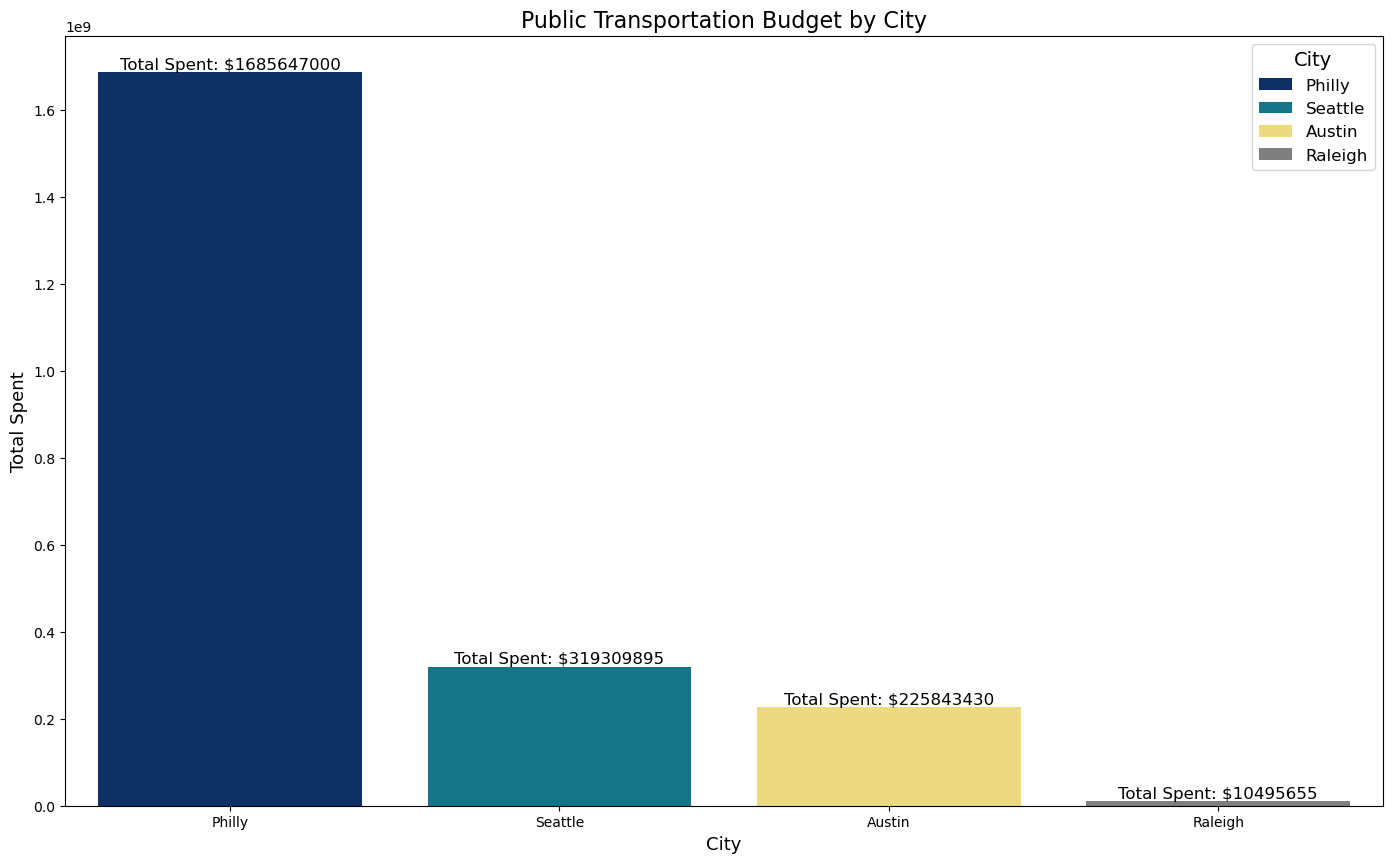

In [120]:

#figures size
plt.figure(figsize=(17,10))

#Color Palattes: https://r02b.github.io/seaborn_palettes/
palette = {'Seattle': "#00839A", 'Philly' : "#002d72",'Raleigh': "#7F7F7F", 'Austin' :"#FEE46E"}

sns.barplot(data=transport_totals, y='Total Spent', x='City', hue='City', palette=palette, legend=True) 

#Add the counts to bars 
for index, row in transport_totals.iterrows():
    plt.text(index, row['Total Spent'] + 1, #x
             f"Total Spent: ${row['Total Spent']}",#\n a newline character
             ha='center', va='bottom', fontsize=12)

#change the legend title and font size
legend = plt.legend(title='City', title_fontsize=14, fontsize=12)

#Label the axises and title
plt.xlabel('City',  fontsize=13)
plt.ylabel('Total Spent',  fontsize=13)
plt.title('Public Transportation Budget by City', fontsize=16)

#adjust the y axis tik counts
#plt.ylim(bottom=0, top=275)

plt.show()

# <center>Access to Public transportation:<center>

Availability of public transit systems

Public transportation DF:
- public_transportation
- austin_public_transportation 
- philly_public_transportation
- raleigh_public_transportation
- seattle_public_transportation

Questions:

How much of the **urbanized area (UZA)** is covered by the transit system?

How much of the UZA population is within the service area?

Transit Availability per Capita?

In [125]:
#Population Coverage - how much of the city population is within reach of transit.
public_transportation['Population Coverage'] = (public_transportation['Service Area Population'] / 
                                                       public_transportation['Primary UZA Population']).round(2)

#Geographic Coverage - how much of the city’s core is covered by transit service.
public_transportation['Geographic Coverage'] = (public_transportation['Service Area Sq Miles'] / 
                                                       public_transportation['Primary UZA Sq Miles']).round(2)

#Population Density of UZA - how concentrated the population is
public_transportation['UZA Population Density'] = (public_transportation['Primary UZA Population'] / 
                                                       public_transportation['Primary UZA Sq Miles']).round(2)

#Population Density of Service Area - how concentrated the population is
public_transportation['Service Area Population Density'] = (public_transportation['Service Area Population'] / 
                                                       public_transportation['Service Area Sq Miles']).round(2)



#My cities: 'Seattle--Tacoma, WA', 'Raleigh, NC', 'Philadelphia, PA--NJ--DE--MD', and 'Austin, TX'.
public_transportation_cities =public_transportation[(public_transportation['Primary UZA Name']== 'Seattle--Tacoma, WA') |
                                        (public_transportation['Primary UZA Name']== 'Raleigh, NC') |
                                        (public_transportation['Primary UZA Name']== 'Philadelphia, PA--NJ--DE--MD') |
                                        (public_transportation['Primary UZA Name']== 'Austin, TX')]

#2024
public_transportation_cities_2024 = public_transportation_cities[public_transportation_cities['Year']== 2024]

#Removing null value rows due to duplicate information in data
public_transportation_cities_2024 = public_transportation_cities_2024[public_transportation_cities_2024["Service Area Population Density"].notna()]
public_transportation_cities_2024

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,Service Area Sq Miles,Service Area Population,Year,Month,Month_Year (timestamp),VOMS,Vehicle Revenue Miles,Vehicle Revenue Hours,Unlinked Passenger Trips,Population Coverage,Geographic Coverage,UZA Population Density,Service Area Population Density
131968,40147,North Carolina State University,University,MB,PT,False,73261.0,"Raleigh, NC",554.82,1106646.0,9.0,46000.0,2024,January,202401,25.0,55248.0,6225.0,266763.0,0.04,0.02,1994.60,5111.11
131969,40147,North Carolina State University,University,MB,PT,False,73261.0,"Raleigh, NC",554.82,1106646.0,9.0,46000.0,2024,February,202402,25.0,64686.0,7294.0,310376.0,0.04,0.02,1994.60,5111.11
131970,40147,North Carolina State University,University,MB,PT,False,73261.0,"Raleigh, NC",554.82,1106646.0,9.0,46000.0,2024,March,202403,25.0,54027.0,6089.0,233166.0,0.04,0.02,1994.60,5111.11
131971,40147,North Carolina State University,University,MB,PT,False,73261.0,"Raleigh, NC",554.82,1106646.0,9.0,46000.0,2024,April,202404,25.0,66700.0,7532.0,306162.0,0.04,0.02,1994.60,5111.11
131972,40147,North Carolina State University,University,MB,PT,False,73261.0,"Raleigh, NC",554.82,1106646.0,9.0,46000.0,2024,May,202405,25.0,27761.0,3776.0,65704.0,0.04,0.02,1994.60,5111.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169362,60048,Capital Metropolitan Transportation Authority,Public Agency or Authority of Transit Service,DR,PT,False,4384.0,"Austin, TX",619.62,1809888.0,549.0,1387423.0,2024,May,202405,190.0,548432.0,39782.0,100835.0,0.77,0.89,2920.96,2527.18
169363,60048,Capital Metropolitan Transportation Authority,Public Agency or Authority of Transit Service,DR,PT,False,4384.0,"Austin, TX",619.62,1809888.0,549.0,1387423.0,2024,June,202406,182.0,506519.0,35716.0,91058.0,0.77,0.89,2920.96,2527.18
169364,60048,Capital Metropolitan Transportation Authority,Public Agency or Authority of Transit Service,DR,PT,False,4384.0,"Austin, TX",619.62,1809888.0,549.0,1387423.0,2024,July,202407,180.0,527954.0,37762.0,94212.0,0.77,0.89,2920.96,2527.18
169365,60048,Capital Metropolitan Transportation Authority,Public Agency or Authority of Transit Service,DR,PT,False,4384.0,"Austin, TX",619.62,1809888.0,549.0,1387423.0,2024,August,202408,190.0,550846.0,38824.0,99229.0,0.77,0.89,2920.96,2527.18


**Transit Systems for Each City:**
- Philly: SEPTA (Southeastern Pennsylvania Transportation Authority)
- Seattle: King County Metro (King County) and Sound Transit (Central Puget Sound Regional Transit Authority)
- Raleigh: City of Raleigh (GoRaleigh)  & Wake County (GoTriangle)
- Austin: CapMetro (Capital Metropolitan Transportation Authority)

In [127]:
ts_each_city = ['Southeastern Pennsylvania Transportation Authority', 'King County',
                'Central Puget Sound Regional Transit Authority',
                'City of Raleigh','Wake County', 
                'Capital Metropolitan Transportation Authority']


mycity_transportation_access = public_transportation_cities_2024[public_transportation_cities_2024['Agency'].isin(ts_each_city)].drop_duplicates('Agency')

#mycity_transportation_access_t = mycity_transportation_access['Primary UZA Name'].value_counts()
#mycity_transportation_access_t
mycity_transportation_access 

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,Service Area Sq Miles,Service Area Population,Year,Month,Month_Year (timestamp),VOMS,Vehicle Revenue Miles,Vehicle Revenue Hours,Unlinked Passenger Trips,Population Coverage,Geographic Coverage,UZA Population Density,Service Area Population Density
132830,40,Central Puget Sound Regional Transit Authority,Public Agency or Authority of Transit Service,LR,DO,True,80389.0,"Seattle--Tacoma, WA",982.52,3544011.0,1089.0,3385200.0,2024,January,202401,80.0,496421.0,31493.0,1718620.0,0.96,1.11,3607.06,3108.54
134051,1,King County,County or Local Government Unit or Department ...,DR,PT,False,80389.0,"Seattle--Tacoma, WA",982.52,3544011.0,2134.0,2347800.0,2024,January,202401,395.0,629468.0,52271.0,84974.0,0.66,2.17,3607.06,1100.19
159698,30019,Southeastern Pennsylvania Transportation Autho...,Public Agency or Authority of Transit Service,TB,DO,False,69076.0,"Philadelphia, PA--NJ--DE--MD",1898.19,5696125.0,830.0,3511062.0,2024,January,202401,27.0,64960.0,7714.0,313799.0,0.62,0.44,3000.82,4230.20
162653,40222,Wake County,County or Local Government Unit or Department ...,DR,PT,False,73261.0,"Raleigh, NC",554.82,1106646.0,861.0,1072203.0,2024,January,202401,40.0,138698.0,7382.0,16056.0,0.97,1.55,1994.60,1245.30
162665,40007,City of Raleigh,County or Local Government Unit or Department ...,MB,PT,False,73261.0,"Raleigh, NC",554.82,1106646.0,125.0,474069.0,2024,January,202401,84.0,306673.0,24799.0,361672.0,0.43,0.23,1994.60,3792.55
169322,60048,Capital Metropolitan Transportation Authority,Public Agency or Authority of Transit Service,MB,PT,False,4384.0,"Austin, TX",619.62,1809888.0,549.0,1387423.0,2024,January,202401,301.0,1181894.0,105828.0,1818566.0,0.77,0.89,2920.96,2527.18


In [128]:
columns_coverage=['Agency','Population Coverage','Geographic Coverage']
transportation_coverage_graphs = mycity_transportation_access[columns_coverage]
columns_density=['Agency','UZA Population Density','Service Area Population Density']
transportation_density_graphs = mycity_transportation_access[columns_density]

coverage_graphs= pd.melt(transportation_coverage_graphs, id_vars='Agency',var_name='Coverage', value_name='Ratio')

density_graphs= pd.melt(transportation_density_graphs, id_vars='Agency',var_name='Density', value_name='Ratio')

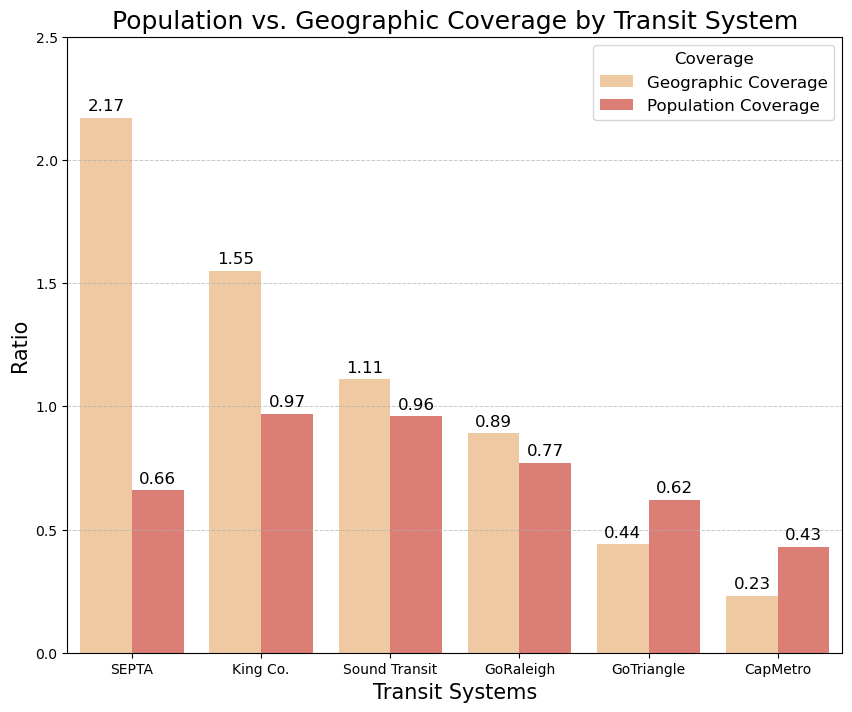

In [129]:
plt.figure(figsize=(10, 8))

#color Palette for graphs
test_colors = {
    'Geographic Coverage': '#fbca94',
    'Population Coverage': '#eb7065'
    
}
colors = list(test_colors.values())

sns.set_palette(colors)


ax=sns.barplot(data=coverage_graphs.sort_values('Ratio', ascending=False), x='Agency', y='Ratio', hue='Coverage', palette=colors)



for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.2f}' for val in container.datavalues], padding=3, fontsize=12) 

abbreviated_labels = [
    'SEPTA',
    'King Co.',
    'Sound Transit',
    'GoRaleigh',
    'GoTriangle',
    'CapMetro'
]


ax.set_xticks(np.arange(len(abbreviated_labels)))
ax.set_xticklabels(abbreviated_labels, ha='center') 

ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.title('Population vs. Geographic Coverage by Transit System', fontsize=18)
plt.ylabel('Ratio',fontsize=15)
plt.xlabel('Transit Systems',fontsize=15)
plt.legend(title='Coverage', title_fontsize=12, fontsize=12)
#plt.tight_layout()

plt.ylim(bottom=0, top=2.5)



plt.show()

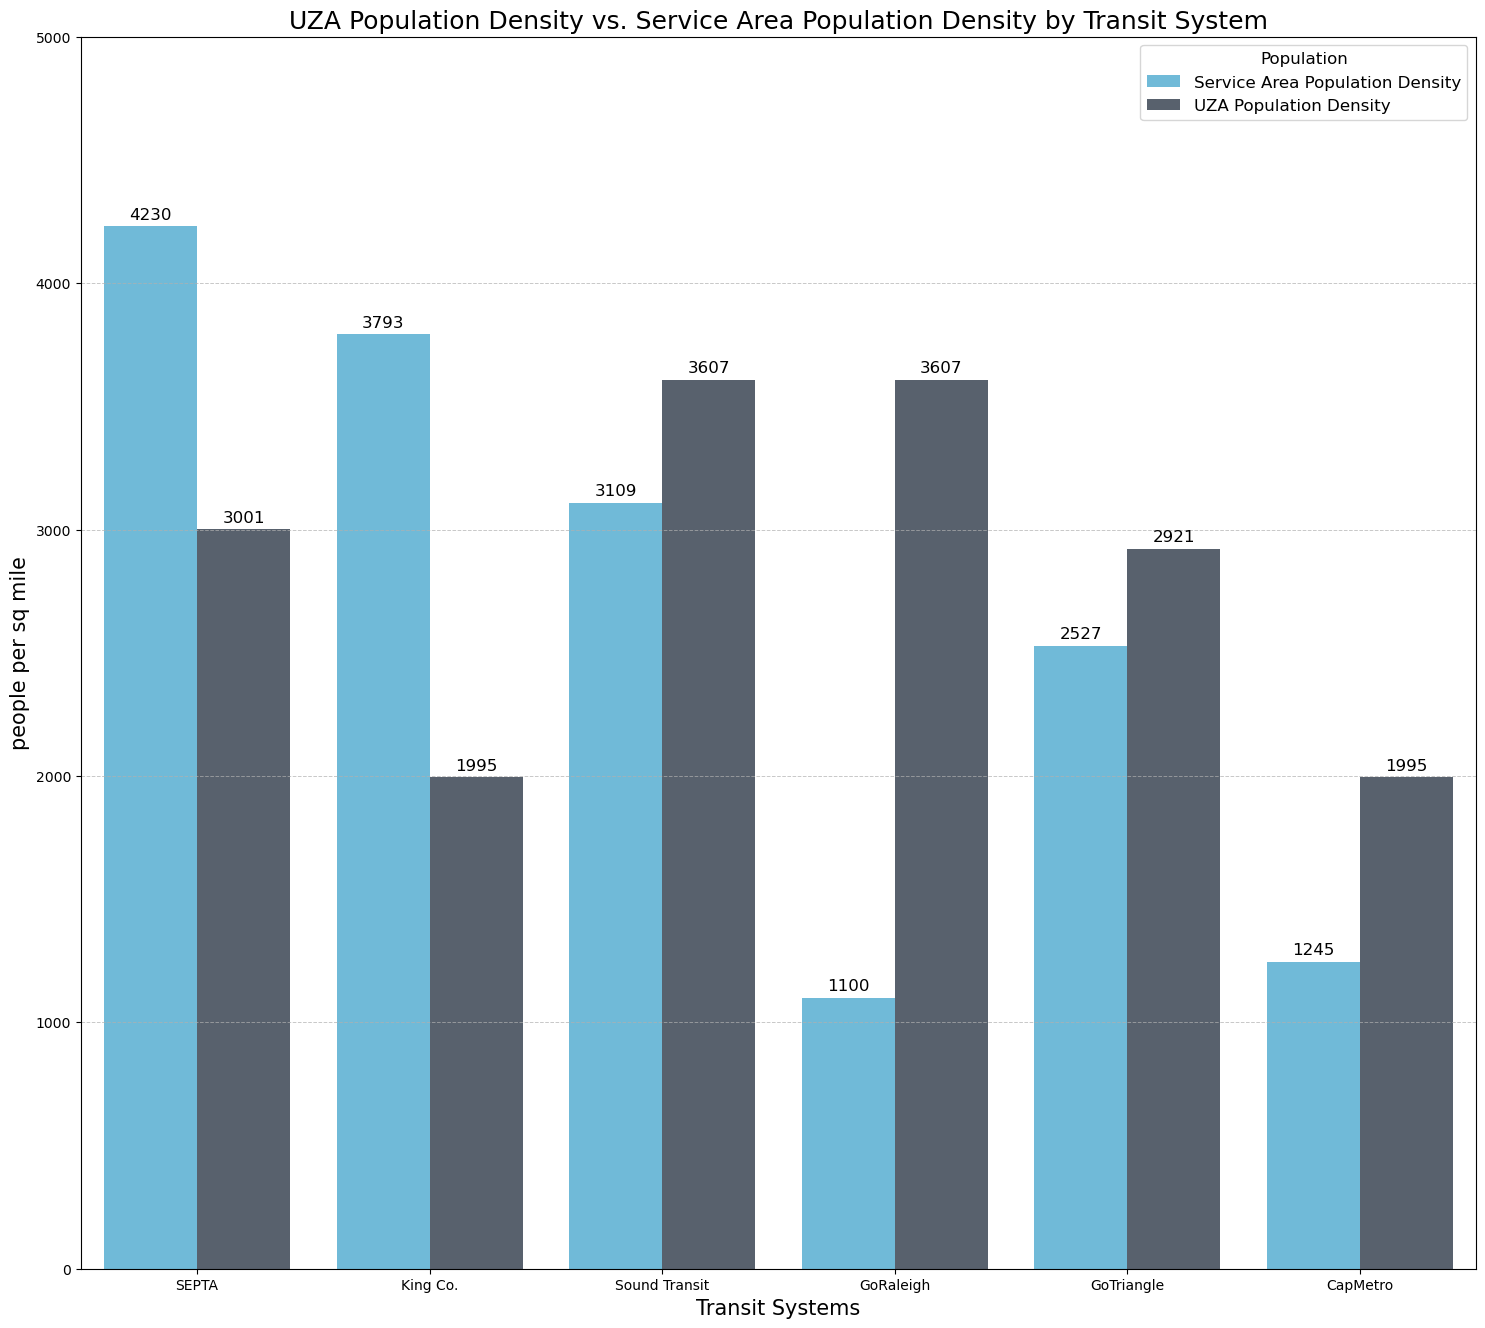

In [130]:
plt.figure(figsize=(18, 16))

#color Palette for graphs
density_colors = {
    'Service Area Population Density': '#5fc1e9',
    'UZA Population Density': '#556070'
    
}
density = list(density_colors.values())

sns.set_palette(density)


ax=sns.barplot(data=density_graphs.sort_values('Ratio', ascending=False), x='Agency', y='Ratio', hue='Density', palette=density)



for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.0f}' for val in container.datavalues], padding=3, fontsize=12) 

abbreviated_labels = [
    'SEPTA',
    'King Co.',
    'Sound Transit',
    'GoRaleigh',
    'GoTriangle',
    'CapMetro'
]


ax.set_xticks(np.arange(len(abbreviated_labels)))
ax.set_xticklabels(abbreviated_labels, ha='center') 

ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.title('UZA Population Density vs. Service Area Population Density by Transit System', fontsize=18)
plt.ylabel('people per sq mile',fontsize=15)
plt.xlabel('Transit Systems',fontsize=15)
plt.legend(title='Population', title_fontsize=12, fontsize=12)
#plt.tight_layout()

plt.ylim(bottom=0, top=5000)



plt.show()

# <center> Commute </center>

In [132]:
seattle_austin_mt_merge = pd.merge(seattle_means_transport, austin_means_transport, on='TRANSPORTATION TO WORK', how='inner')
raleigh_seattle_austin_mt_merge = pd.merge(seattle_austin_mt_merge, raleigh_means_transport, on='TRANSPORTATION TO WORK', how='inner')
mycity_means_transport = pd.merge(raleigh_seattle_austin_mt_merge, philly_means_transport, on='TRANSPORTATION TO WORK', how='inner')
mycity_means_transport 

,TRANSPORTATION TO WORK,Seattle Total Estimate,Seattle Total Margin of Error,Seattle Male Estimate,Seattle Male Margin of Error,Seattle Female Estimate,Seattle Female Margin of Error,Austin Total Estimate,Austin Total Margin of Error,Austin Male Estimate,Austin Male Margin of Error,Austin Female Estimate,Austin Female Margin of Error,Raleigh Total Estimate,Raleigh Total Margin of Error,Raleigh Male Estimate,Raleigh Male Margin of Error,Raleigh Female Estimate,Raleigh Female Margin of Error,Philadelphia Total Estimate,Philadelphia Total Margin of Error,Philadelphia Male Estimate,Philadelphia Male Margin of Error,Philadelphia Female Estimate,Philadelphia Female Margin of Error
0,"Car, truck, or van",60.9%,±0.9,61.1%,±1.0,60.6%,±1.3,67.3%,±1.1,67.8%,±1.7,66.7%,±1.5,68.7%,±1.3,69.1%,±1.8,68.3%,±1.7,54.00%,±1.6,57.40%,±2.1,50.80%,±2.2
1,Drove alone,53.2%,±0.9,53.8%,±1.0,52.5%,±1.2,60.4%,±1.4,62.0%,±1.8,58.6%,±2.0,62.9%,±1.4,63.0%,±1.7,62.7%,±1.8,45.60%,±1.6,48.90%,±2.2,42.60%,±2.2
2,Carpooled,7.7%,±0.7,7.4%,±0.8,8.1%,±0.7,6.9%,±0.9,5.8%,±0.9,8.1%,±1.4,5.8%,±0.7,6.1%,±1.0,5.5%,±1.0,8.40%,±1.0,8.50%,±1.4,8.30%,±1.1
3,In 2-person carpool,6.1%,±0.6,5.7%,±0.7,6.5%,±0.6,5.2%,±0.7,4.2%,±0.8,6.4%,±0.9,4.7%,±0.7,4.7%,±1.0,4.7%,±1.0,6.40%,±0.8,6.40%,±1.1,6.50%,±0.9
4,In 3-person carpool,1.0%,±0.2,0.9%,±0.2,1.1%,±0.2,1.0%,±0.4,0.8%,±0.3,1.2%,±0.9,0.6%,±0.2,0.6%,±0.3,0.6%,±0.2,1.50%,±0.4,1.60%,±0.4,1.40%,±0.5
5,In 4-or-more person carpool,0.6%,±0.2,0.7%,±0.3,0.5%,±0.2,0.7%,±0.2,0.8%,±0.3,0.5%,±0.2,0.5%,±0.2,0.8%,±0.3,0.2%,±0.1,0.50%,±0.2,0.60%,±0.4,0.40%,±0.2
6,"Workers per car, truck, or van",1.07,±0.01,1.07,±0.01,1.08,±0.01,1.06,±0.01,1.05,±0.01,1.07,±0.01,1.05,±0.01,1.05,±0.01,1.04,±0.01,1.09,±0.01,1.09,±0.02,1.1,±0.01
7,Public transportation (excluding taxicab),8.0%,±0.5,8.1%,±0.6,7.9%,±0.7,1.3%,±0.3,1.4%,±0.4,1.2%,±0.3,0.7%,±0.2,0.7%,±0.3,0.7%,±0.4,16.70%,±1.2,15.50%,±1.6,17.90%,±1.7
8,Walked,4.5%,±0.4,4.8%,±0.5,4.2%,±0.5,2.0%,±0.4,2.0%,±0.6,2.0%,±0.4,1.3%,±0.3,1.1%,±0.3,1.6%,±0.5,9.40%,±0.7,8.90%,±1.0,9.80%,±0.9
9,Bicycle,1.2%,±0.2,1.6%,±0.3,0.8%,±0.2,0.6%,±0.2,0.9%,±0.4,0.4%,±0.2,0.3%,±0.1,0.4%,±0.2,0.2%,±0.1,1.80%,±0.3,2.30%,±0.5,1.40%,±0.4


In [133]:
total_columns = ['TRANSPORTATION TO WORK', 'Seattle Total Estimate','Austin Total Estimate','Raleigh Total Estimate','Philadelphia Total Estimate']
mycity_means_transport = mycity_means_transport[total_columns]
mycity_means_transport = mycity_means_transport.drop([1,2,3,4,5,6])


In [134]:
mycity_means_transport_t = mycity_means_transport['TRANSPORTATION TO WORK'].value_counts()
mycity_means_transport_t

TRANSPORTATION TO WORK
Car, truck, or van                           1
Public transportation (excluding taxicab)    1
Walked                                       1
Bicycle                                      1
Taxicab, motorcycle, or other means          1
Worked from home                             1
Name: count, dtype: int64

In [135]:
mycity_means_transport.columns = ['TRANSPORTATION TO WORK', 'Seattle', 'Austin', 'Raleigh', 'Philadelphia']

In [136]:
mycity_means_transport

,TRANSPORTATION TO WORK,Seattle,Austin,Raleigh,Philadelphia
0,"Car, truck, or van",60.9%,67.3%,68.7%,54.00%
7,Public transportation (excluding taxicab),8.0%,1.3%,0.7%,16.70%
8,Walked,4.5%,2.0%,1.3%,9.40%
9,Bicycle,1.2%,0.6%,0.3%,1.80%
10,"Taxicab, motorcycle, or other means",1.3%,1.3%,1.6%,1.90%
11,Worked from home,24.0%,27.4%,27.3%,16.20%


In [137]:
mycity_means_transport_transposed = mycity_means_transport.T.reset_index()

header  = mycity_means_transport_transposed .iloc[0] #grab the first row for the header
mycity_means_transport_transposed = mycity_means_transport_transposed[1:] #take the data less the header row
mycity_means_transport_transposed.columns = header #set the header row as the df header
mycity_means_transport_transposed

,TRANSPORTATION TO WORK,"Car, truck, or van",Public transportation (excluding taxicab),Walked,Bicycle,"Taxicab, motorcycle, or other means",Worked from home
1,Seattle,60.9%,8.0%,4.5%,1.2%,1.3%,24.0%
2,Austin,67.3%,1.3%,2.0%,0.6%,1.3%,27.4%
3,Raleigh,68.7%,0.7%,1.3%,0.3%,1.6%,27.3%
4,Philadelphia,54.00%,16.70%,9.40%,1.80%,1.90%,16.20%


In [138]:
mycity_means_transport_transposed.columns = ['City', 'Car, truck, or van', 'Public transportation', 'Walked', 'Bicycle','Other means', 'Worked from home']

In [139]:
mycity_means_transport_transposed

,City,"Car, truck, or van",Public transportation,Walked,Bicycle,Other means,Worked from home
1,Seattle,60.9%,8.0%,4.5%,1.2%,1.3%,24.0%
2,Austin,67.3%,1.3%,2.0%,0.6%,1.3%,27.4%
3,Raleigh,68.7%,0.7%,1.3%,0.3%,1.6%,27.3%
4,Philadelphia,54.00%,16.70%,9.40%,1.80%,1.90%,16.20%


In [140]:
for city in mycity_means_transport_transposed.columns[1:]:
    mycity_means_transport_transposed[city] = mycity_means_transport_transposed[city].str.replace('%', '').astype(float)

In [141]:
mycity_means_transport_transposed['Other Means New'] = ((mycity_means_transport_transposed['Walked']+
                                                        mycity_means_transport_transposed['Bicycle'])+
                                                        mycity_means_transport_transposed['Other means'])
columns_to_drop = ['Walked', 'Bicycle', 'Other means']
mycity_means_transport_transposed = mycity_means_transport_transposed.drop(columns_to_drop, axis=1)

In [142]:
means_transport = mycity_means_transport_transposed.rename(columns={'Car, truck, or van': 'Drove Themselves', 'Other Means New': 'Other Means'})
means_transport 

,City,Drove Themselves,Public transportation,Worked from home,Other Means
1,Seattle,60.9,8.0,24.0,7.0
2,Austin,67.3,1.3,27.4,3.9
3,Raleigh,68.7,0.7,27.3,3.2
4,Philadelphia,54.0,16.7,16.2,13.1


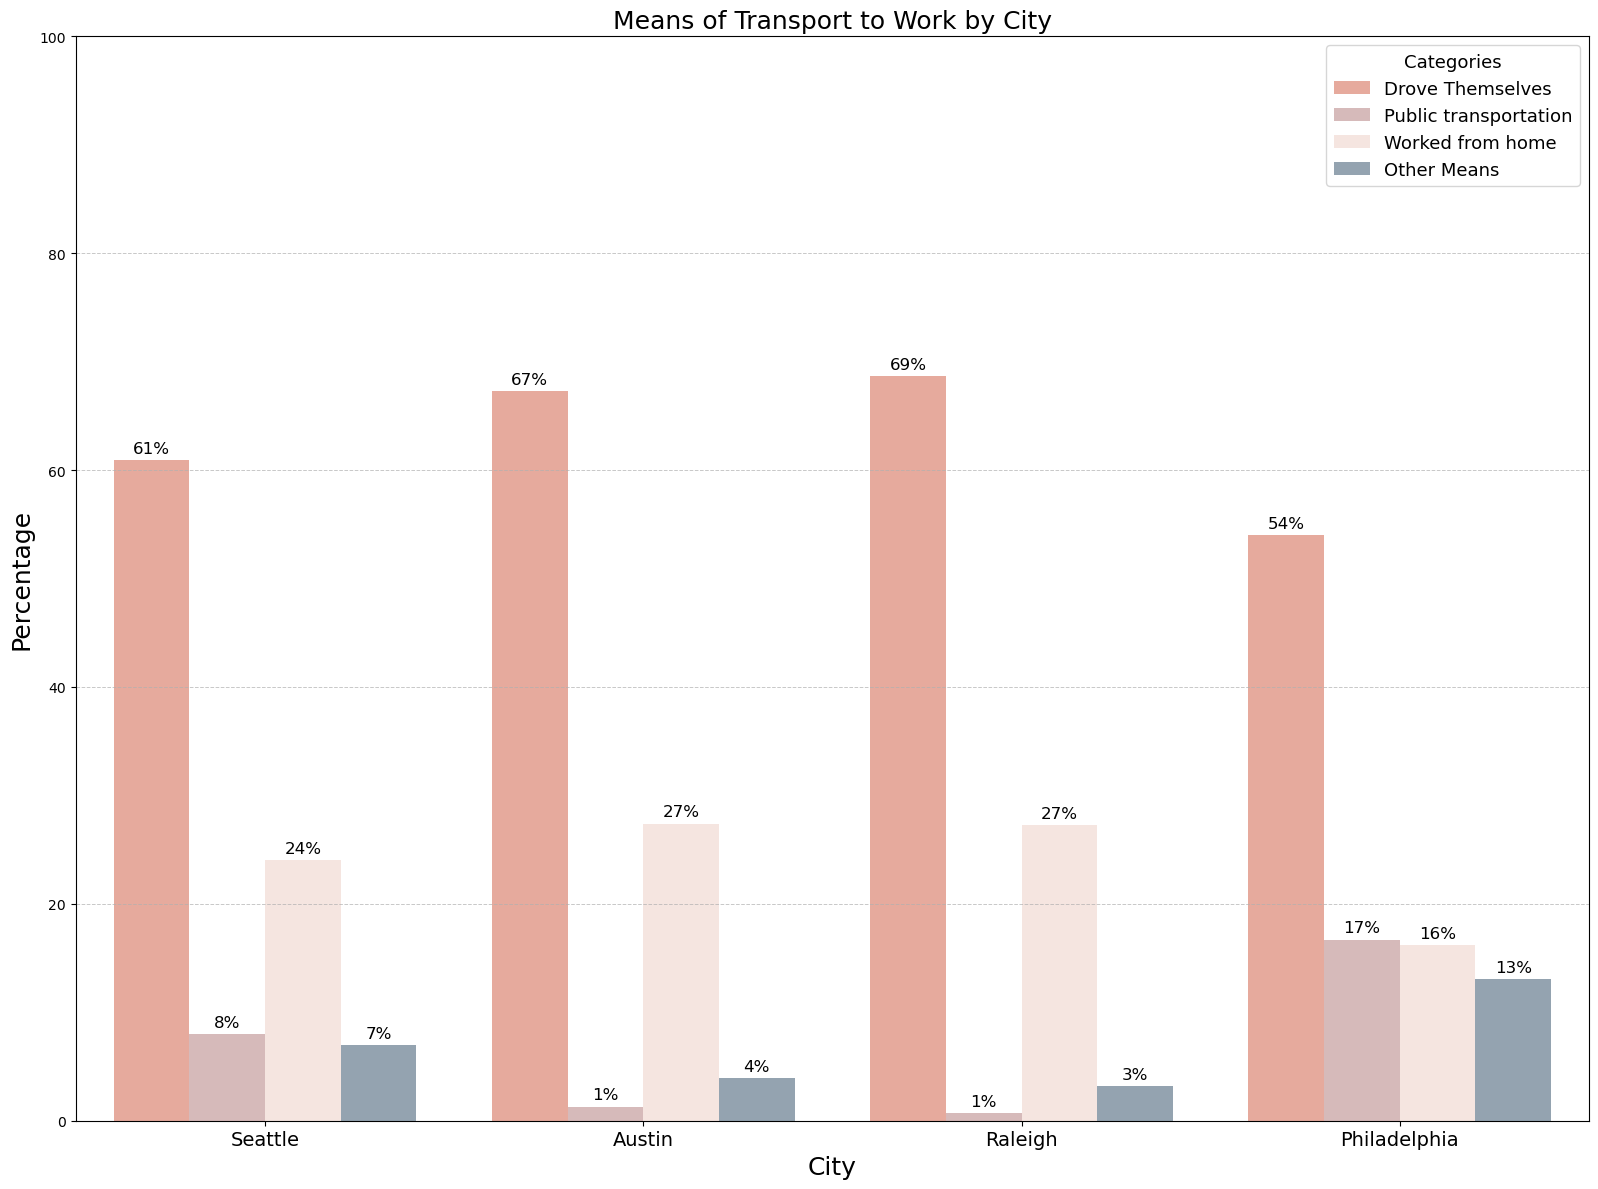

In [143]:
means_transport_graphs= pd.melt(means_transport, id_vars='City',var_name='Categories', value_name='Percentage')


plt.figure(figsize=(16, 12))

#color Palette for graphs
colors = {
            'Drove Themselves':'#f2a291',
            'Public transportation':'#dbb6b5',
            'Worked from home':'#f8e3dc',
            'Other Means':'#90a3b4'
}
color_palette = list(colors.values())

sns.set_palette(color_palette)


ax=sns.barplot(data=means_transport_graphs, x='City', y='Percentage', hue='Categories', palette=colors)



for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.0f}%' for val in container.datavalues], padding=3, fontsize=12) 


cities = mycity_means_transport_transposed['City']
x = range(len(cities))  

ax.set_xticks(x)
ax.set_xticklabels(cities, fontsize=14)


ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.title('Means of Transport to Work by City', fontsize=18)
plt.ylabel('Percentage',fontsize=18)
plt.xlabel('City',fontsize=18)
plt.legend(title='Categories', title_fontsize=13, fontsize=13)
plt.tight_layout()

plt.ylim(bottom=0, top=100)



plt.show()

In [144]:
seattle_austin_tt_merge = pd.merge(seattle_travel_time, austin_travel_time, on='TRAVEL TIME TO WORK', how='inner')
raleigh_seattle_austin_tt_merge = pd.merge(seattle_austin_tt_merge, raleigh_travel_time, on='TRAVEL TIME TO WORK', how='inner')
mycity_travel_time = pd.merge(raleigh_seattle_austin_tt_merge, philly_travel_time, on='TRAVEL TIME TO WORK', how='inner')

In [145]:
total_times_columns = ['TRAVEL TIME TO WORK', 'Seattle Total Estimate','Austin Total Estimate','Raleigh Total Estimate','Philadelphia Total Estimate']
travel_times = mycity_travel_time[total_times_columns]
travel_times.columns = ['City', 'Seattle', 'Austin', 'Raleigh', 'Philadelphia']

In [146]:
travel_times_transport_transposed =travel_times.T.reset_index()

In [147]:
travel_times_header  = travel_times_transport_transposed.iloc[0] #grab the first row for the header
travel_times_transport_transposed = travel_times_transport_transposed[1:] #take the data less the header row
travel_times_transport_transposed.columns = travel_times_header #set the header row as the df header

In [148]:
for city in travel_times_transport_transposed.columns[1:]:
    travel_times_transport_transposed[city] = travel_times_transport_transposed[city].str.replace('%', '').astype(float)

In [149]:
travel_times_transport_transposed

,City,Less than 10 minutes,10 to 14 minutes,15 to 19 minutes,20 to 24 minutes,25 to 29 minutes,30 to 34 minutes,35 to 44 minutes,45 to 59 minutes,60 or more minutes,Mean travel time to work (minutes)
1,Seattle,8.3,11.2,14.7,15.4,8.0,15.6,9.5,9.3,8.0,27.6
2,Austin,9.8,12.4,18.3,16.9,7.0,15.4,8.6,7.0,4.6,24.6
3,Raleigh,9.2,11.9,16.8,15.3,10.4,15.6,8.2,7.6,5.1,25.2
4,Philadelphia,7.7,7.3,11.3,13.8,7.7,19.7,10.0,11.0,11.7,31.1


In [150]:
mean_travel_time = travel_times_transport_transposed[['City','Mean travel time to work (minutes)']]
mean_travel_time

,City,Mean travel time to work (minutes)
1,Seattle,27.6
2,Austin,24.6
3,Raleigh,25.2
4,Philadelphia,31.1


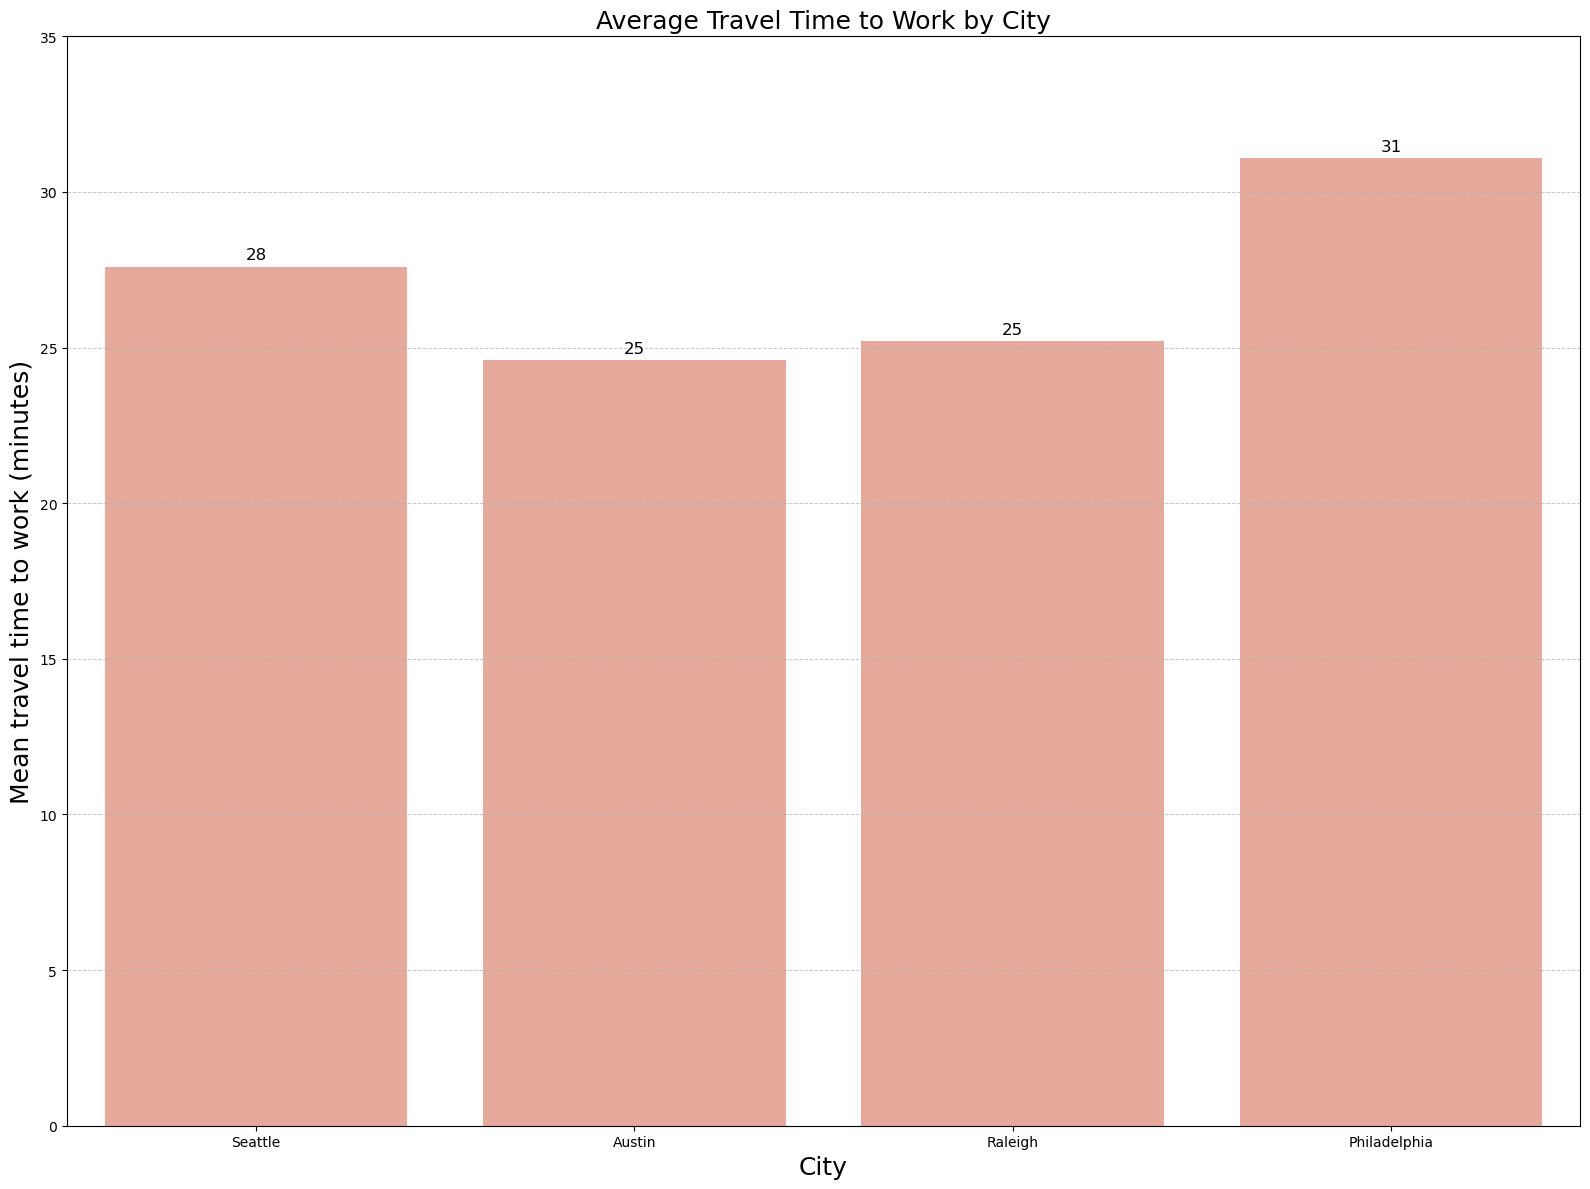

In [151]:

plt.figure(figsize=(16, 12))

#color Palette for graphs
#colors = {
 #           'Drove Themselves':'#f2a291',
 #           'Public transportation':'#dbb6b5',
 #           'Worked from home':'#f8e3dc',
   #         'Other Means':'#90a3b4'
#}
#color_palette = list(colors.values())

#sns.set_palette(color_palette)


ax=sns.barplot(data=mean_travel_time, x='City', y='Mean travel time to work (minutes)')



for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.0f}' for val in container.datavalues], padding=3, fontsize=12) 


#cities = mycity_means_transport_transposed['City']
#x = range(len(cities))  

#ax.set_xticks(x)
#ax.set_xticklabels(cities, fontsize=14)


ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.title('Average Travel Time to Work by City', fontsize=18)
plt.ylabel('Mean travel time to work (minutes)',fontsize=18)
plt.xlabel('City',fontsize=18)
plt.tight_layout()

plt.ylim(bottom=0, top=35)



plt.show()

# <center> Housing <center>

**<center>Median Monthly Rent & Median Home Price<center>**

In [154]:
#metro_rent.head()
metro_rent_cost_cities = metro_rent[(metro_rent['RegionName']== 'Austin, TX') |
                                        (metro_rent['RegionName']== 'Seattle, WA') |
                                        (metro_rent['RegionName']== 'Raleigh, NC') |
                                        (metro_rent['RegionName']== 'Philadelphia, PA')]
metro_rent_cost_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024,6/30/2024,7/31/2024,8/31/2024,9/30/2024,10/31/2024,11/30/2024,12/31/2024,1/31/2025,2/28/2025,3/31/2025
7,394974,7,"Philadelphia, PA",msa,PA,1322.596104,1331.334849,1343.488803,1351.244081,1355.779985,1358.373231,1361.620823,1362.365544,1363.838839,1364.321152,1359.306256,1358.037073,1358.975357,1367.889168,1376.976411,1385.969691,1392.929252,1399.825999,1401.658392,1402.392357,1398.655956,1396.586292,1399.594746,1402.319762,1409.210088,1415.642352,1427.736566,1435.839860,1441.686158,1441.277961,1443.004009,1445.263118,1448.380275,1450.618821,1451.418628,1453.651876,1454.138327,1460.556147,1472.936159,1485.588725,1496.003008,1498.861956,1498.467105,1495.738323,1497.766294,1502.853931,1507.831195,1507.436172,1511.205250,1518.558363,1529.548493,1539.483512,1547.647879,1554.850146,1557.719899,1557.190026,1557.594668,1561.355617,1564.387100,1568.739358,1571.826759,1580.865063,1589.688275,1594.778374,1599.523735,1604.664285,1617.918259,1626.795256,1637.919808,1641.903873,1648.669984,1654.525208,1666.065332,1681.003612,1690.292782,1705.975025,1720.083528,1736.916480,1750.082210,1764.432420,1766.515951,1779.648547,1793.258586,1818.796557,1831.820312,1841.194679,1854.106252,1865.333347,1878.275728,1894.190870,1909.561460,1923.701328,1929.796986,1933.188892,1938.171999,1938.206733,1944.671948,1953.638795,1968.090981,1979.101440,1986.376957,1995.188528,2003.924830,2011.975107,2026.112540,2044.316413,2058.211538,2057.916913,2061.085607,2067.380161,2080.777017,2087.259508,2097.151397,2102.570471,2110.463904,2117.936692,2132.138363,2147.375080,2164.233032,2177.524646,2179.253123,2183.365181,2178.595577
15,395078,15,"Seattle, WA",msa,WA,1807.784639,1818.723307,1837.685370,1850.849338,1876.537254,1898.206266,1923.881231,1929.161642,1928.298927,1924.665747,1920.804330,1929.605668,1941.108457,1964.834128,1977.065624,1999.562541,2025.707963,2056.231510,2078.770890,2082.988222,2078.104318,2064.384011,2055.077680,2044.892077,2063.371203,2085.773397,2124.510882,2148.752767,2177.851530,2204.688702,2220.835984,2227.316586,2225.153097,2217.348632,2203.638362,2193.223973,2197.566553,2211.757062,2238.594892,2262.838981,2292.389554,2305.989833,2312.557739,2304.270928,2298.212031,2287.618898,2283.305290,2281.607451,2294.897408,2312.492200,2338.950080,2359.291595,2379.127813,2392.055416,2400.954099,2407.813409,2397.378417,2392.850565,2386.373099,2389.847693,2405.841293,2423.206853,2450.462141,2458.710578,2468.013083,2474.877640,2491.134943,2505.162179,2518.633525,2523.284631,2524.471156,2525.783062,2532.888466,2553.520248,2578.271291,2607.785580,2637.138760,2666.561133,2696.816413,2726.495183,2748.154832,2756.186427,2754.287414,2759.378404,2773.213081,2805.044902,2836.956917,2875.982681,2905.895145,2937.206626,2956.279171,2963.288502,2958.148192,2949.922212,2931.757223,29

In [155]:
city_ids = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
rent_dates = metro_rent_cost_cities.drop(columns=city_ids)
rent_dates.columns = pd.to_datetime(rent_dates.columns)

#https://www.geeksforgeeks.org/python-pandas-dataframe-transpose
#https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.DataFrame.transpose.html
rent_dates_transposed = rent_dates.T

#https://www.demo2s.com/g/python/how-to-use-python-pandas-datetimeindex-year.html
rent_dates_transposed['Year'] = rent_dates_transposed.index.year

#getting the average by year
rent_avg_year = rent_dates_transposed.groupby('Year').mean().round(0)

#transpose it back to original format to add back the id columns
rent_avg_year = rent_avg_year.T

#add back the id columns
yearly_average_rent = pd.concat([metro_rent_cost_cities[city_ids], rent_avg_year], axis=1)

yearly_average_rent 

,RegionID,SizeRank,RegionName,RegionType,StateName,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
7,394974,7,"Philadelphia, PA",msa,PA,1353.0,1390.0,1439.0,1490.0,1547.0,1614.0,1739.0,1895.0,2002.0,2112.0,2180.0
15,395078,15,"Seattle, WA",msa,WA,1887.0,2031.0,2174.0,2273.0,2371.0,2481.0,2668.0,2902.0,3032.0,3167.0,3221.0
29,394355,29,"Austin, TX",msa,TX,1553.0,1604.0,1645.0,1689.0,1755.0,1824.0,2048.0,2276.0,2309.0,2298.0,2285.0
42,395012,43,"Raleigh, NC",msa,NC,1264.0,1309.0,1359.0,1411.0,1468.0,1532.0,1689.0,1883.0,1975.0,2047.0,2072.0


In [156]:
rent_transposed = yearly_average_rent.T.reset_index()
rent_transposed_header  = rent_transposed.iloc[4]
rent_transposed = rent_transposed[5:]
rent_transposed.columns = rent_transposed_header
rent_transposed.columns = ['Year', 'Philadelphia', 'Seattle', 'Austin', 'Raleigh']
rent_transposed

,Year,Philadelphia,Seattle,Austin,Raleigh
5,2015,1353.0,1887.0,1553.0,1264.0
6,2016,1390.0,2031.0,1604.0,1309.0
7,2017,1439.0,2174.0,1645.0,1359.0
8,2018,1490.0,2273.0,1689.0,1411.0
9,2019,1547.0,2371.0,1755.0,1468.0
10,2020,1614.0,2481.0,1824.0,1532.0
11,2021,1739.0,2668.0,2048.0,1689.0
12,2022,1895.0,2902.0,2276.0,1883.0
13,2023,2002.0,3032.0,2309.0,1975.0
14,2024,2112.0,3167.0,2298.0,2047.0


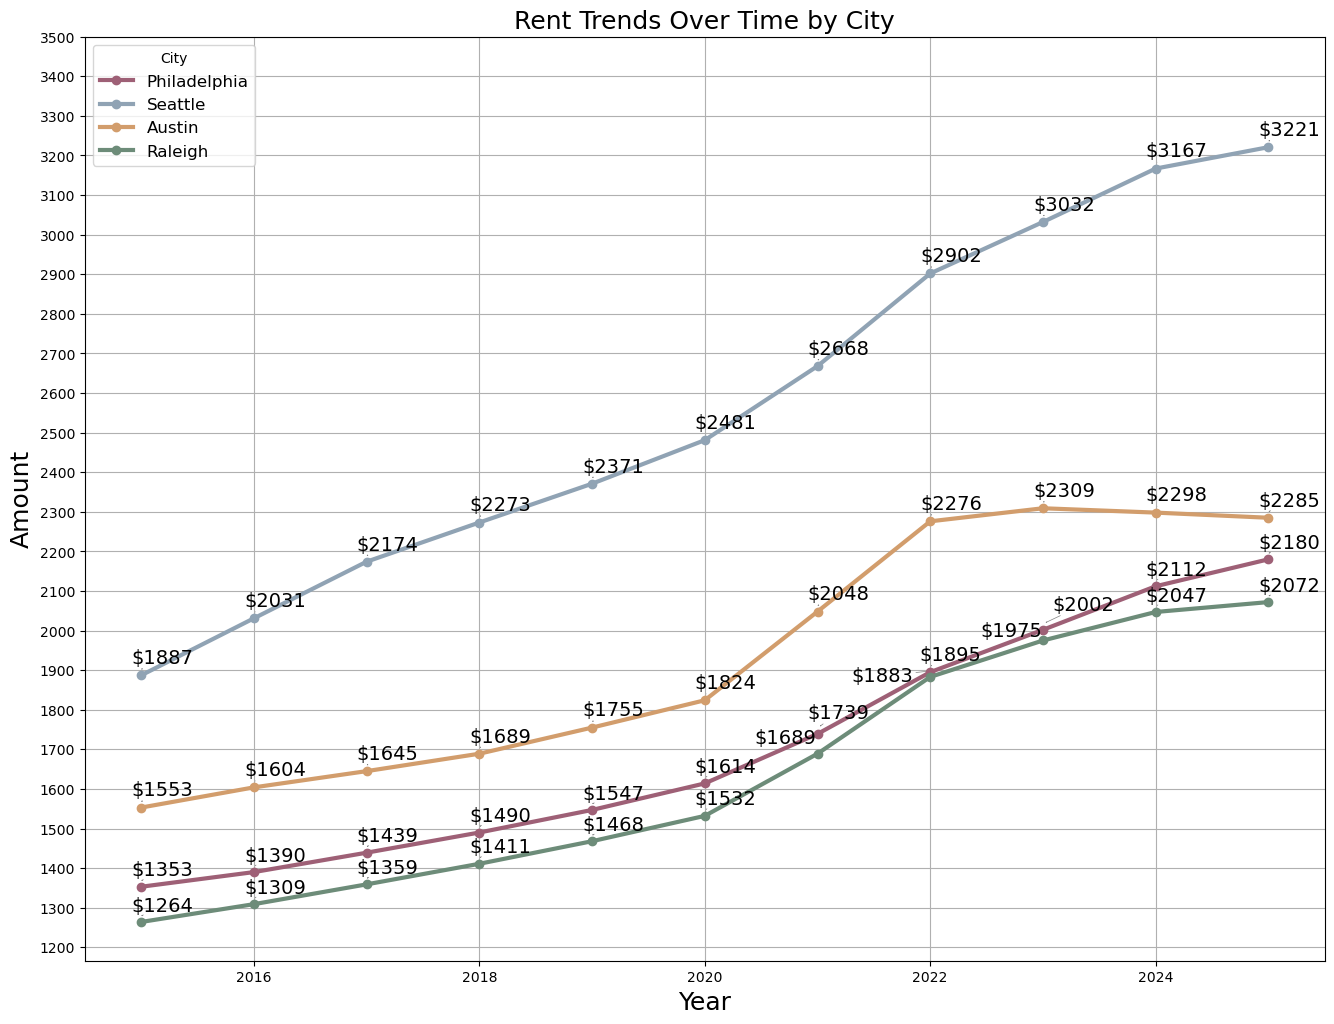

In [461]:
plt.figure(figsize=(16, 12))

city_colors = {
    'Austin': '#d29d6c',
    'Raleigh': '#6d8c79',
    'Seattle': '#90a3b4',
    'Philadelphia': '#9e6076'
}


texts = [] 


for city in rent_transposed.columns[1:]:  # Skip 'Year' column
    city_key = city
    plt.plot(rent_transposed["Year"],rent_transposed[city], label=city_key, color=city_colors[city_key], linewidth=3, marker='o')

#https://realpython.com/python-zip-function/
#https://www.freecodecamp.org/news/the-zip-function-in-python-explained-with-examples
#https://stackoverflow.com/questions/63583615/how-to-adjust-text-in-matplotlib-scatter-plot-so-scatter-points-dont-overlap     
    for x, y in zip(rent_transposed["Year"], rent_transposed[city]):
            txt = plt.text(x, y + 15, f"${y:.0f}", ha='center', fontsize=14)
            texts.append(txt)
#https://stackoverflow.com/questions/63583615/how-to-adjust-text-in-matplotlib-scatter-plot-so-scatter-points-dont-overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=0.5))     

plt.ticklabel_format(style='plain', axis='y')
plt.title("Rent Trends Over Time by City", fontsize= 18)
plt.xlabel("Year", fontsize= 18)
plt.ylabel("Amount", fontsize= 18)
plt.yticks(np.arange(1200, 3501, 100))
plt.grid(True)
plt.legend(title="City", fontsize= 12)


plt.show()

In [158]:
#metro_house_price.head()
metro_house_price_cities = metro_house_price[(metro_house_price['RegionName']== 'Austin, TX') |
                                        (metro_house_price['RegionName']== 'Seattle, WA') |
                                        (metro_house_price['RegionName']== 'Raleigh, NC') |
                                        (metro_house_price['RegionName']== 'Philadelphia, PA')]
metro_house_price_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024,6/30/2024,7/31/2024,8/31/2024,9/30/2024,10/31/2024,11/30/2024,12/31/2024,1/31/2025,2/28/2025
7,394974,7,"Philadelphia, PA",msa,PA,228331.0,230562.0,232590.0,244327.0,257676.0,265920.0,270644.0,241498.0,227688.0,223150.0,223100.0,212952.0,209718.0,210599.0,217687.0,228691.0,247665.0,251247.0,249060.0,228944.0,220473.0,220422.0,226347.0,231152.0,222500.0,221398.0,231745.0,233210.0,258619.0,257338.0,251272.0,237946.0,227305.0,234292.0,224783.0,229580.0,213826.0,218782.0,221115.0,238516.0,251399.0,249622.0,250236.0,224590.0,218718.0,222964.0,218490.0,222576.0,205713.0,224762.0,226850.0,238675.0,260813.0,259051.0,257390.0,235042.0,227802.0,238400.0,235026.0,221530.0,209259.0,228832.0,234103.0,253632.0,273305.0,270103.0,256158.0,243667.0,237905.0,236677.0,239687.0,229364.0,220272.0,222338.0,229289.0,250097.0,270484.0,268713.0,267964.0,238805.0,239851.0,239333.0,234882.0,225841.0,204137.0,224629.0,233349.0,252306.0,269111.0,264832.0,255025.0,248606.0,234793.0,237920.0,228359.0,228654.0,219951.0,222295.0,235226.0,242387.0,264409.0,270621.0,260265.0,246036.0,236016.0,236837.0,244225.0,229720.0,215990.0,235808.0,244390.0,263277.0,282959.0,278756.0,265783.0,250723.0,246764.0,251888.0,252398.0,237831.0,229007.0,247912.0,246982.0,261186.0,285335.0,280867.0,279085.0,255040.0,248869.0,251741.0,250975.0,239148.0,242009.0,248175.0,262546.0,275419.0,302250.0,297929.0,291042.0,270316.0,266105.0,270642.0,269002.0,266993.0,262916.0,274686.0,301916.0,291489.0,298981.0,318227.0,328940.0,317255.0,309955.0,313178.0,311646.0,308277.0,301380.0,310437.0,320974.0,330187.0,362253.0,363134.0,363773.0,333514.0,336053.0,338832.0,323550.0,312348.0,310161.0,323548.0,345619.0,367728.0,395100.0,384912.0,381993.0,359299.0,352515.0,351662.0,347473.0,335854.0,324525.0,353093.0,352711.0,376536.0,405577.0,406878.0,407732.0,379715.0,377168.0,371722.0,377446.0,370493.0,359201.0,378096.0,396727.0,414777.0,445392.0,438756.0,435886.0,409054.0,408948.0,41

In [159]:
house_city_ids = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName']
house_dates = metro_house_price_cities.drop(columns=house_city_ids)
house_dates.columns = pd.to_datetime(house_dates.columns)

#https://www.geeksforgeeks.org/python-pandas-dataframe-transpose
#https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.DataFrame.transpose.html
house_dates_transposed = house_dates.T

#https://www.demo2s.com/g/python/how-to-use-python-pandas-datetimeindex-year.html
house_dates_transposed['Year'] = house_dates_transposed.index.year

#getting the average by year
house_avg_year = house_dates_transposed.groupby('Year').mean().round(0)

#transpose it back to original format to add back the id columns
house_avg_year = house_avg_year.T

#add back the id columns
yearly_average_house = pd.concat([metro_house_price_cities[city_ids], house_avg_year], axis=1)

yearly_average_house

,RegionID,SizeRank,RegionName,RegionType,StateName,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
7,394974,7,"Philadelphia, PA",msa,PA,240499.0,226984.0,235963.0,229820.0,236008.0,242072.0,242616.0,239909.0,242244.0,251538.0,256236.0,269549.0,299682.0,332697.0,352696.0,372413.0,406017.0,391380.0
15,395078,15,"Seattle, WA",msa,WA,415403.0,362783.0,369782.0,331605.0,344151.0,382108.0,404907.0,435066.0,472191.0,530677.0,576866.0,599976.0,664452.0,805672.0,877881.0,860838.0,945329.0,897922.0
29,394355,29,"Austin, TX",msa,TX,245439.0,241442.0,256164.0,256581.0,272278.0,291833.0,310376.0,334256.0,353569.0,376434.0,394956.0,411226.0,459334.0,596760.0,661198.0,609959.0,609992.0,590490.0
42,395012,43,"Raleigh, NC",msa,NC,220234.0,213254.0,226619.0,214117.0,216826.0,225531.0,234867.0,248472.0,259979.0,280898.0,294013.0,306286.0,333800.0,401847.0,470259.0,490439.0,527836.0,524481.0


In [160]:
home_cost_cities = single_fam_home_cost[(single_fam_home_cost['RegionName']== 'Travis County') |
                                        (single_fam_home_cost['RegionName']== 'Wake County') |
                                        (single_fam_home_cost['RegionName']== 'King County') |
                                        (single_fam_home_cost['RegionName']== 'Philadelphia County')]
home_cost_cities

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000,1/31/2001,2/28/2001,3/31/2001,4/30/2001,5/31/2001,6/30/2001,7/31/2001,8/31/2001,9/30/2001,10/31/2001,11/30/2001,12/31/2001,1/31/2002,2/28/2002,3/31/2002,4/30/2002,5/31/2002,6/30/2002,7/31/2002,8/31/2002,9/30/2002,10/31/2002,11/30/2002,12/31/2002,1/31/2003,2/28/2003,3/31/2003,4/30/2003,5/31/2003,6/30/2003,7/31/2003,8/31/2003,9/30/2003,10/31/2003,11/30/2003,12/31/2003,1/31/2004,2/29/2004,3/31/2004,4/30/2004,5/31/2004,6/30/2004,7/31/2004,8/31/2004,9/30/2004,10/31/2004,11/30/2004,12/31/2004,1/31/2005,2/28/2005,3/31/2005,4/30/2005,5/31/2005,6/30/2005,7/31/2005,8/31/2005,9/30/2005,10/31/2005,11/30/2005,12/31/2005,1/31/2006,2/28/2006,3/31/2006,4/30/2006,5/31/2006,6/30/2006,7/31/2006,8/31/2006,9/30/2006,10/31/2006,11/30/2006,12/31/2006,1/31/2007,2/28/2007,3/31/2007,4/30/2007,5/31/2007,6/30/2007,7/31/2007,8/31/2007,9/30/2007,10/31/2007,11/30/2007,12/31/2007,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021,4/30/2021,5/31/2021,6/30/2021,7/31/2021,8/31/2021,9/30/2021,10/31/2021,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024,6/30/2024,7/31/2024,8/31/2024,9/30/2024,10/31/2024,11/30/2024,12/31/2024,1/31/2025,2/28/2025,3/31/2025,4/30/2025
11,207,11,King County,county,WA,WA,"Seattle-Tacoma-Bellevue, WA",53,33,274125.064448,275264.652222,276369.845363,278522.126538,280941.321097,283077.401220,285541.452752,287355.668896,288932.509318,289973.588636,291110.858020,292595.684179,294511.516165,296505.029803,298416.468427,299898.599435,300947.220346,301926.110080,302887.943373,304167.718478,305146.381445,306241.983197,307130.977063,308495.993475,309396.258924,310432.108321,311476.776978,313028.568114,314577.538845,315683.423586,316511.829161,317449.607326,318395.146815,319361.733428,320326.709852,320853.844996,321987.467687,322888.298500,324603.296355,325961.201021,327911.676660,329630.615088,331198.827543,332898.501239,334755.987269,336646.991746,337894.926883,339436.371004,341565.627527,344243.252350,346563.560408,34921

In [161]:
home_ids = ['RegionID','SizeRank','RegionName', 'RegionType', 'StateName', 'State',	'Metro','StateCodeFIPS', 'MunicipalCodeFIPS']
home_cost_dates = home_cost_cities.drop(columns=home_ids)
home_cost_dates.columns = pd.to_datetime(home_cost_dates.columns)

#https://www.geeksforgeeks.org/python-pandas-dataframe-transpose
#https://pandas.pydata.org/pandas-docs/version/1.5/reference/api/pandas.DataFrame.transpose.html
home_cost_dates_transposed = home_cost_dates.T

#https://www.demo2s.com/g/python/how-to-use-python-pandas-datetimeindex-year.html
home_cost_dates_transposed['Year'] = home_cost_dates_transposed.index.year

home_cost_avg_year = home_cost_dates_transposed.groupby('Year').mean().round(0)

#transpose it back to original format to add back the id columns
home_cost_avg_year  = home_cost_avg_year.T

#add back the id columns
yearly_average_home_cost = pd.concat([home_cost_cities[home_ids], home_cost_avg_year], axis=1)

yearly_average_home_cost

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
11,207,11,King County,county,WA,WA,"Seattle-Tacoma-Bellevue, WA",53,33,283651.0,302190.0,315624.0,330485.0,358503.0,408422.0,478809.0,516990.0,490731.0,428683.0,404928.0,371767.0,350969.0,389436.0,426421.0,471459.0,537770.0,611342.0,689523.0,682252.0,721014.0,842667.0,973882.0,923301.0,969855.0,997083.0
22,3175,22,Philadelphia County,county,PA,PA,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",42,101,61949.0,65613.0,69493.0,76301.0,86365.0,103449.0,120057.0,127026.0,126200.0,120785.0,120755.0,113835.0,109816.0,109350.0,112969.0,118562.0,128284.0,143128.0,158127.0,172678.0,188985.0,208426.0,219099.0,214305.0,218648.0,223922.0
33,1440,33,Travis County,county,TX,TX,"Austin-Round Rock-Georgetown, TX",48,453,202679.0,208643.0,208101.0,207029.0,210517.0,217069.0,223462.0,233865.0,239004.0,229841.0,226612.0,220728.0,226920.0,252201.0,282528.0,312789.0,336326.0,352725.0,366297.0,380443.0,414079.0,540291.0,643302.0,582192.0,555120.0,535877.0
39,324,39,Wake County,county,NC,NC,"Raleigh-Cary, NC",37,183,197661.0,203462.0,206661.0,209373.0,214073.0,222656.0,236534.0,250486.0,250503.0,241591.0,237334.0,226784.0,222751.0,231800.0,244958.0,259110.0,278184.0,294472.0,308856.0,322485.0,337341.0,392449.0,486897.0,489577.0,504473.0,504735.0


In [435]:
home_cost_transposed = yearly_average_home_cost.T.reset_index()
home_cost_transposed_header  = home_cost_transposed.iloc[8]
home_cost_transposed = home_cost_transposed[9:]
home_cost_transposed.columns = home_cost_transposed_header
home_cost_transposed.columns = ['Year', 'Seattle','Philadelphia','Austin', 'Raleigh']
home_cost_graph= home_cost_transposed[(home_cost_transposed['Year'] >= 2015) & 
                                        (home_cost_transposed['Year'] <= 2024)]
home_cost_graph

,Year,Seattle,Philadelphia,Austin,Raleigh
24,2015,471459.0,118562.0,312789.0,259110.0
25,2016,537770.0,128284.0,336326.0,278184.0
26,2017,611342.0,143128.0,352725.0,294472.0
27,2018,689523.0,158127.0,366297.0,308856.0
28,2019,682252.0,172678.0,380443.0,322485.0
29,2020,721014.0,188985.0,414079.0,337341.0
30,2021,842667.0,208426.0,540291.0,392449.0
31,2022,973882.0,219099.0,643302.0,486897.0
32,2023,923301.0,214305.0,582192.0,489577.0
33,2024,969855.0,218648.0,555120.0,504473.0


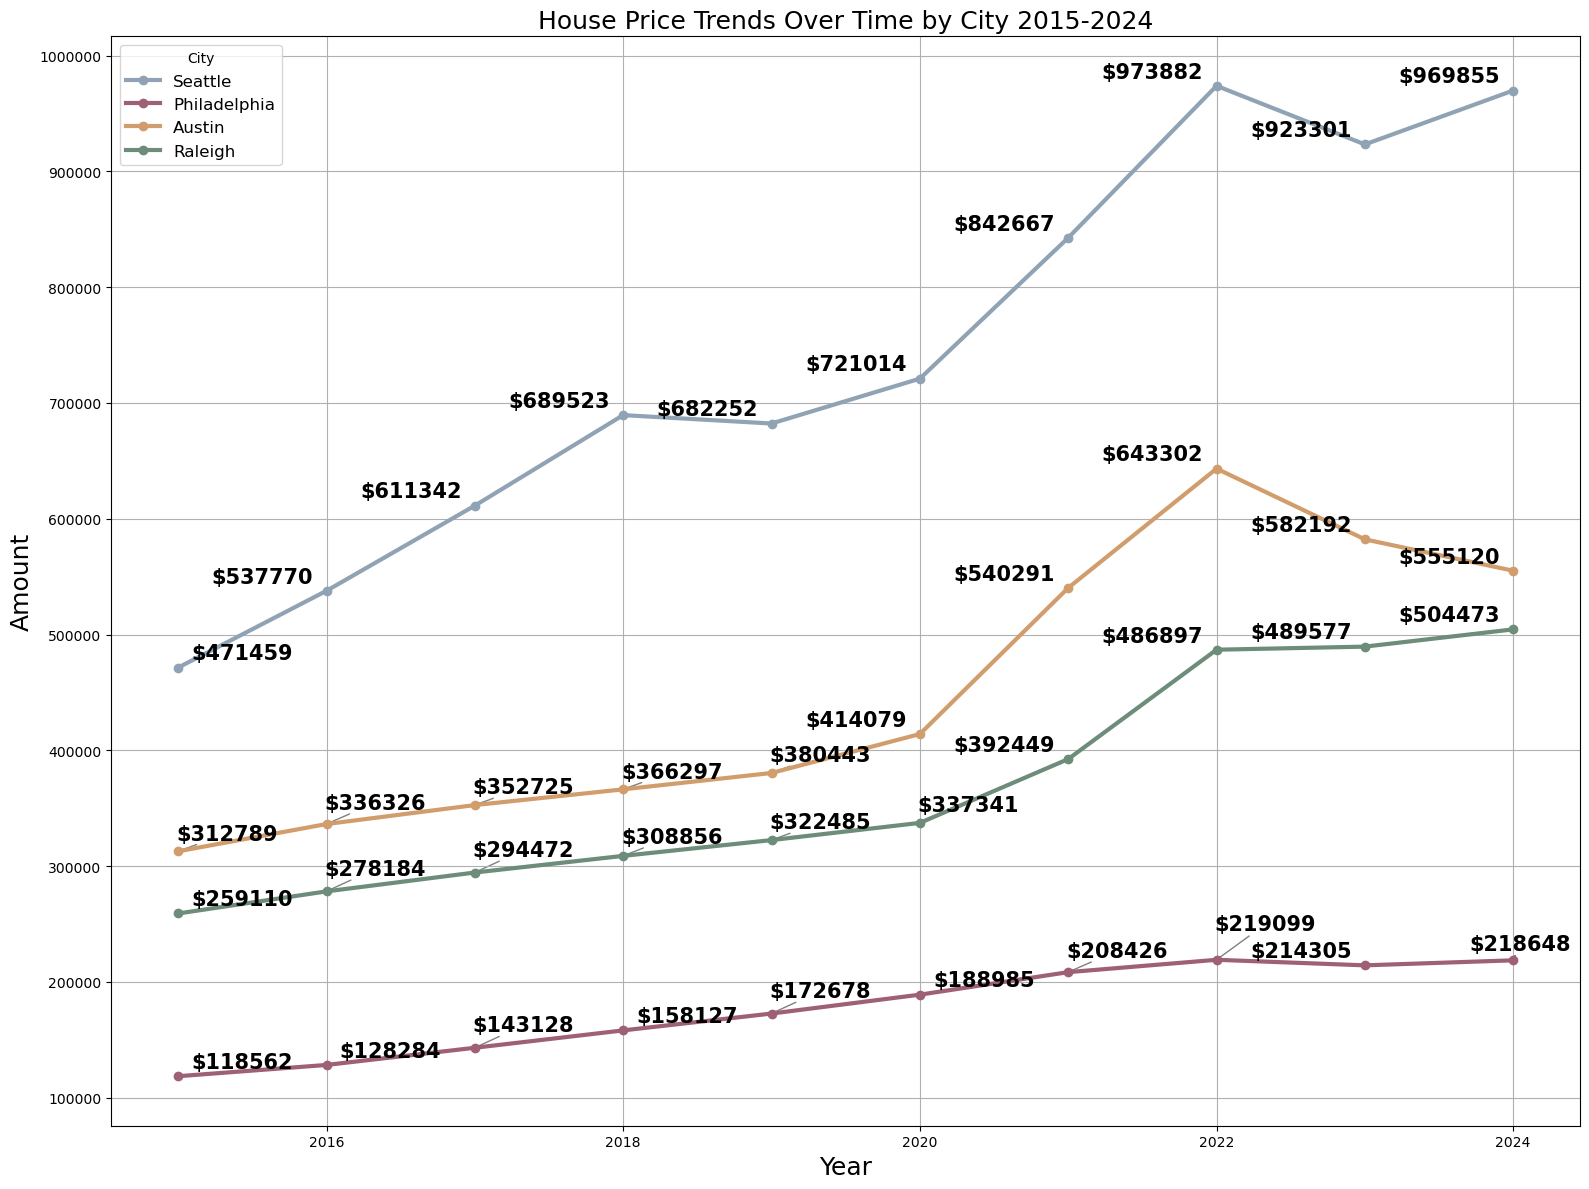

In [467]:
plt.figure(figsize=(16, 12))

city_colors = {
    'Austin': '#d29d6c',
    'Raleigh': '#6d8c79',
    'Seattle': '#90a3b4',
    'Philadelphia': '#9e6076'
}


texts = [] 

for city in home_cost_graph.columns[1:]: # Skip 'Year'
    city_key = city #pull out city name
    plt.plot(home_cost_graph["Year"],home_cost_graph[city], label=city_key,  color=city_colors[city_key],linewidth=3, marker='o')

#https://realpython.com/python-zip-function/
#https://www.freecodecamp.org/news/the-zip-function-in-python-explained-with-examples
#https://stackoverflow.com/questions/63583615/how-to-adjust-text-in-matplotlib-scatter-plot-so-scatter-points-dont-overlap     
    for x, y in zip(home_cost_graph["Year"], home_cost_graph[city]):
            txt = plt.text(x, y + 30, f"${y:.0f}", ha='center',fontweight='bold', fontsize=15)
            texts.append(txt)
#https://stackoverflow.com/questions/63583615/how-to-adjust-text-in-matplotlib-scatter-plot-so-scatter-points-dont-overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1))   

#https://stackoverflow.com/questions/14442099/matplotlib-how-to-show-all-digits-on-ticks
plt.ticklabel_format(style='plain', axis='y')
plt.title("House Price Trends Over Time by City 2015-2024",  fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Amount", fontsize=18)
plt.yticks(np.arange(100000, 1050001, 100000))
plt.grid(True)
plt.legend(title="City", fontsize=12)
plt.tight_layout()

plt.show()

# <center> Utility Rates & Consumption Expenditures <center>

Utility Df:
- avg_monthly_utility_usage

Personal Consumption:
- pc_personal_consumption_us


In [166]:
pd.options.mode.copy_on_write = True 
mycity_monthly_utility_usage = avg_monthly_utility_usage[(avg_monthly_utility_usage['State']=='Texas')|
                            (avg_monthly_utility_usage['State']=='Washington')| 
                            (avg_monthly_utility_usage['State']=='Pennsylvania')|
                            (avg_monthly_utility_usage['State']=='North Carolina')]



#mycity_monthly_utility_usage['State Abbreviation'] = mycity_monthly_utility_usage['State'].apply(lambda x: 'WA' if x == 'Washington' 
                                                                                              #  else'PA' if x == 'Pennsylvania' 
                                                                                             #    else'NC' if x == 'North Carolina' 
                                                                                             #    else 'TX' if x == 'Texas' else None)

In [167]:
mycity_monthly_utility_usage

,State,Number of Customers,Average Monthly Consumption (kWh),Average Price (cents/kWh),Average Monthly Bill (Dollar and cents)
10,Pennsylvania,"5,516,157",791,18.10,143.10
31,North Carolina,"4,951,380",989,12.93,127.79
44,Texas,"12,257,008","1,146",14.46,165.82
57,Washington,"3,319,836",977,10.98,107.35


In [168]:
pc_personal_consumption_mycity =  pc_personal_consumption_us[(pc_personal_consumption_us['State']=='Texas')|
                                                            (pc_personal_consumption_us['State']=='Washington')| 
                                                            (pc_personal_consumption_us['State']=='Pennsylvania')|
                                                            (pc_personal_consumption_us['State']=='North Carolina')]

pc_personal_consumption_mycity

,State,Total personal consumption expenditures,Housing and utilities,Health care,Food and beverages for off-premises consumption,Gasoline and other energy goods,All other personal consumption expenditures
14,Pennsylvania,"57,009","9,146","9,609","4,201","1,471","32,581"
37,North Carolina,"51,081","8,860","8,166","4,271","1,399","28,384"
46,Texas,"52,299","9,428","7,411","4,123","1,500","29,836"
59,Washington,"60,528","11,785","9,013","4,543","1,146","34,041"


In [169]:
water_bill_mycity =  water_bill_avg[(water_bill_avg['state']=='Texas')|
                                    (water_bill_avg['state']=='Washington')| 
                                    (water_bill_avg['state']=='Pennsylvania')|
                                    (water_bill_avg['state']=='North Carolina')]

water_bill_mycity = water_bill_mycity.rename(columns={'state': 'State'})

In [170]:
utility_usage = pd.merge(mycity_monthly_utility_usage, water_bill_mycity, on='State', how='inner')

columns = ['State','Average Monthly Bill (Dollar and cents)','WaterPrices_MonthlyWaterBill_usd_2024']

utility_usage = utility_usage[columns]

utility_usage.columns = ['State', 'Average Monthly Electric Bill', 'Average Monthly Water Bill']
utility_usage

,State,Average Monthly Electric Bill,Average Monthly Water Bill
0,Pennsylvania,143.10,31
1,North Carolina,127.79,20
2,Texas,165.82,45
3,Washington,107.35,78


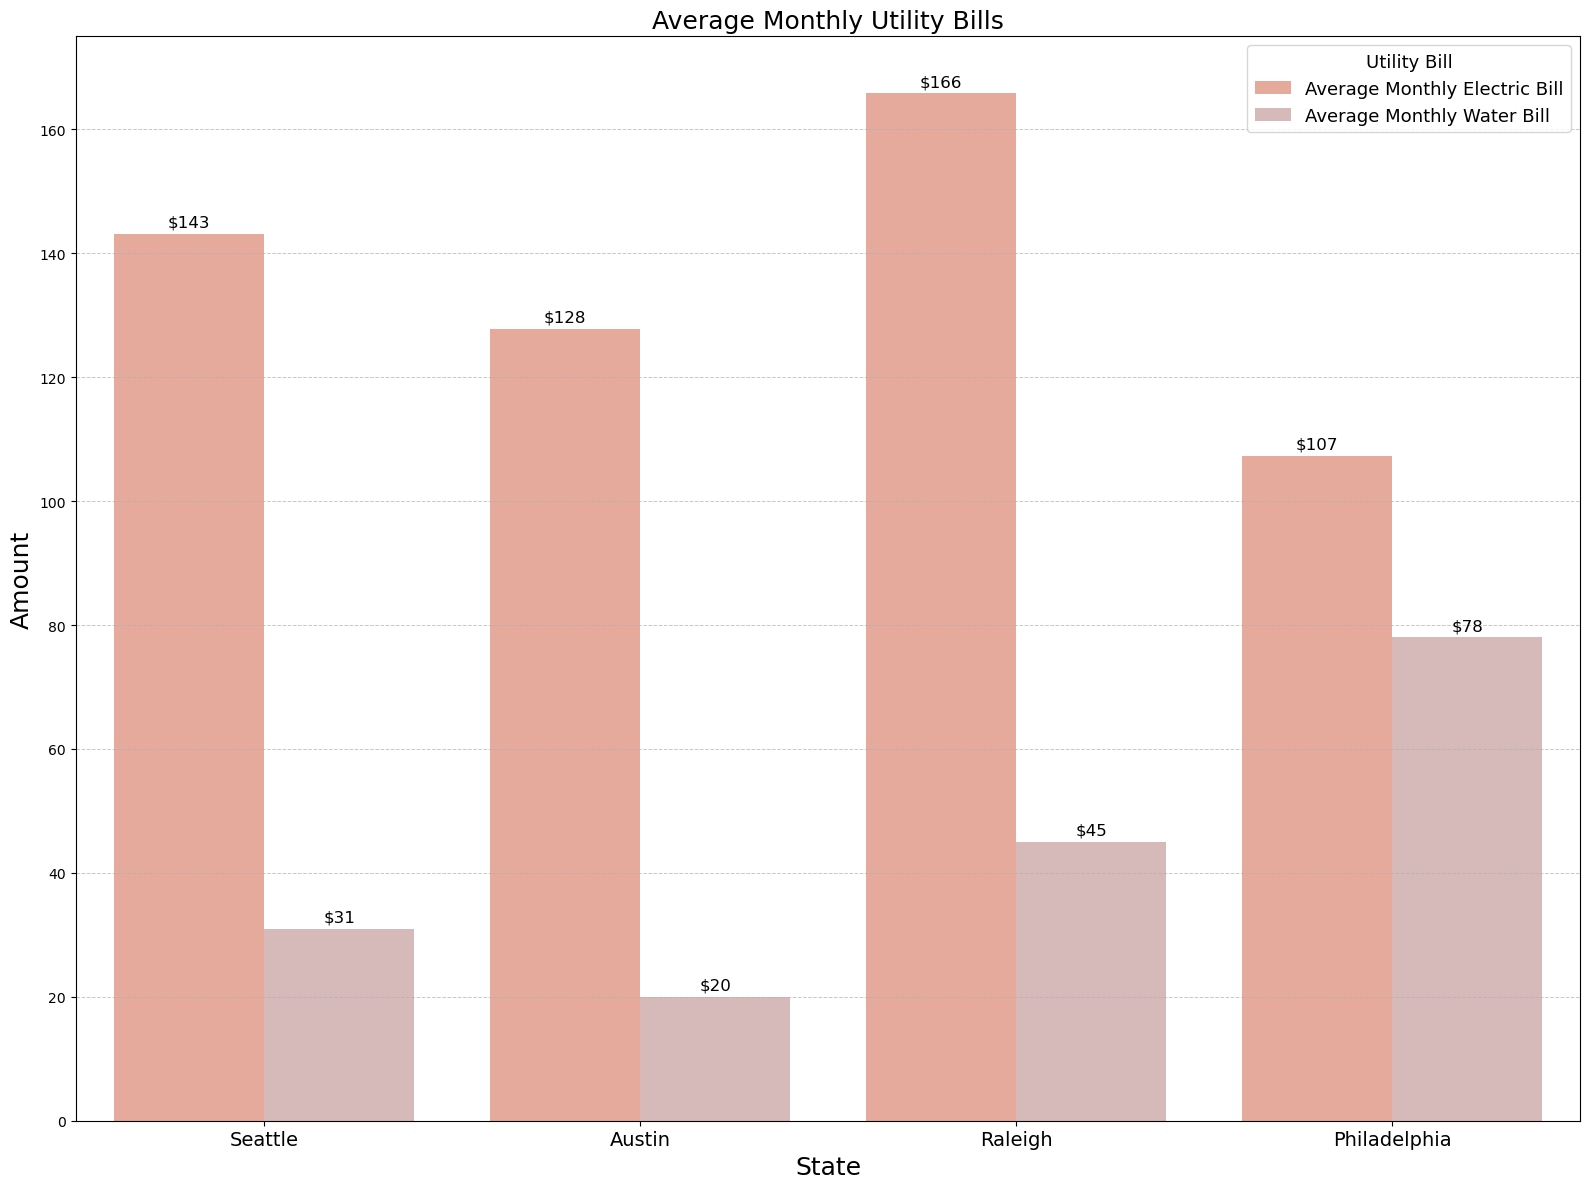

In [171]:
utility_usage_graphs= pd.melt(utility_usage, id_vars='State',var_name='Bill', value_name='Amount')


plt.figure(figsize=(16, 12))

#color Palette for graphs
#colors = {
         #   'Drove Themselves':'#f2a291',
         #   'Public transportation':'#dbb6b5',
         #   'Worked from home':'#f8e3dc',
         #   'Other Means':'#90a3b4'
#}
#color_palette = list(colors.values())

#sns.set_palette(color_palette)


ax=sns.barplot(data=utility_usage_graphs, x='State', y='Amount', hue='Bill')



for container in ax.containers:
    ax.bar_label(container, labels=[f'${val:.0f}' for val in container.datavalues], padding=3, fontsize=12) 


state = utility_usage['State']
x = range(len(state))  

ax.set_xticks(x)
ax.set_xticklabels(cities, fontsize=14)


ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.title('Average Monthly Utility Bills', fontsize=18)
plt.ylabel('Amount',fontsize=18)
plt.xlabel('State',fontsize=18)
plt.legend(title='Utility Bill', title_fontsize=13, fontsize=13)
plt.tight_layout()

plt.ylim(bottom=0, top=175)



plt.show()

# <center> Social Characteristics <center>

- Racial diversity per city
- Foreign-born population %
- Number of languages spoken

Data:
- Seattle: seattle_place_birth, seattle_region_birth, seattle_language, seattle_ancestry
- Raleigh: raleigh_place_birth, raleigh_region_birth, raleigh_language, raleigh_ancestry
- Philly: philadelphia_place_birth, philadelphia_region_birth, philadelphia_language, philadelphia_ancestry
- Austin: austin_place_birth, austin_region_birth, austin_language, austin_ancestry

In [175]:
mycity_place_birth= seattle_place_birth.merge(raleigh_place_birth, on='Place of Birth').merge(philadelphia_place_birth, on='Place of Birth'). merge(austin_place_birth, on='Place of Birth')

mycity_place_birth.head()

,Place of Birth,Seattle Estimate,Seattle Margin of Error,Seattle Percent,Seattle Percent Margin of Error,Raleigh Estimate,Raleigh Margin of Error,Raleigh Percent,Raleigh Percent Margin of Error,Philadelphia Estimate,Philadelphia Margin of Error,Philadelphia Percent,Philadelphia Percent Margin of Error,Austin Estimate,Austin Margin of Error,Austin Percent,Austin Percent Margin of Error
0,Total population,"2,271,380",*****,"2,271,380",(X),"1,190,275",*****,"1,190,275",(X),"1,550,542",*****,"1,550,542",(X),"1,334,961",*****,"1,334,961",(X)
1,Native,"1,685,370","±13,160",74.2%,±0.6,"1,003,401","±8,762",84.3%,±0.7,"1,316,634","±12,886",84.9%,±0.8,"1,097,042","±12,869",82.20%,±1.0
2,Born in United States,"1,643,773","±14,054",72.4%,±0.6,"982,214","±9,462",82.5%,±0.8,"1,264,340","±13,189",81.5%,±0.9,"1,067,112","±13,293",79.90%,±1.0
3,State of residence,"878,581","±13,258",38.7%,±0.6,"489,390","±13,181",41.1%,±1.1,"965,021","±17,491",62.2%,±1.1,"651,087","±13,168",48.80%,±1.0
4,Different state,"765,192","±15,515",33.7%,±0.7,"492,824","±13,718",41.4%,±1.2,"299,319","±12,432",19.3%,±0.8,"416,025","±13,323",31.20%,±1.0


In [176]:
mycity_region_birth= seattle_region_birth.merge(raleigh_region_birth, on='Region of Birth').merge(philadelphia_region_birth, on='Region of Birth'). merge(austin_region_birth, on='Region of Birth')

mycity_region_birth.head()

,Region of Birth,Seattle Estimate,Seattle Margin of Error,Seattle Percent,Seattle Percent Margin of Error,Raleigh Estimate,Raleigh Margin of Error,Raleigh Percent,Raleigh Percent Margin of Error,Philadelphia Estimate,Philadelphia Margin of Error,Philadelphia Percent,Philadelphia Percent Margin of Error,Austin Estimate,Austin Margin of Error,Austin Percent,Austin Percent Margin of Error
0,"Foreign-born population, excluding population ...","586,010","±13,160","586,010",(X),"186,874","±8,762","186,874",(X),"233,908","±12,886","233,908",(X),"237,919","±12,869","237,919",(X)
1,Europe,"70,183","±6,410",12.0%,±1.1,"18,908","±2,742",10.1%,±1.4,"35,548","±6,223",15.2%,±2.5,"20,833","±3,637",8.8%,±1.4
2,Asia,"338,663","±7,245",57.8%,±1.2,"76,347","±3,413",40.9%,±2.1,"88,542","±3,664",37.9%,±2.4,"80,049","±4,440",33.6%,±1.9
3,Africa,"49,746","±6,050",8.5%,±1.0,"17,556","±4,138",9.4%,±2.1,"27,485","±7,008",11.8%,±2.8,"14,269","±4,213",6.0%,±1.7
4,Oceania,"9,071","±2,067",1.5%,±0.3,385,±275,0.2%,±0.1,181,±155,0.1%,±0.1,736,±444,0.3%,±0.2


In [177]:
region_columns = [ 'Region of Birth', 'Seattle Estimate', 'Raleigh Estimate','Philadelphia Estimate', 'Austin Estimate']
region_of_birth = mycity_region_birth[region_columns]
region_of_birth_transposed = region_of_birth.T.reset_index()
region_of_birth_header  = region_of_birth_transposed.iloc[0]
region_of_birth_transposed = region_of_birth_transposed[1:]
region_of_birth_transposed.columns = region_of_birth_header
region_of_birth_transposed.columns = ['City', 'Foreign-born population','Europe','Asia', 'Africa', 'Oceania', 'Latin America', 'Northern America']

In [178]:
region_of_birth_transposed

,City,Foreign-born population,Europe,Asia,Africa,Oceania,Latin America,Northern America
1,Seattle Estimate,"586,010","70,183","338,663","49,746","9,071","99,466","18,881"
2,Raleigh Estimate,"186,874","18,908","76,347","17,556",385,"67,971","5,707"
3,Philadelphia Estimate,"233,908","35,548","88,542","27,485",181,"80,100","2,052"
4,Austin Estimate,"237,919","20,833","80,049","14,269",736,"118,071","3,961"


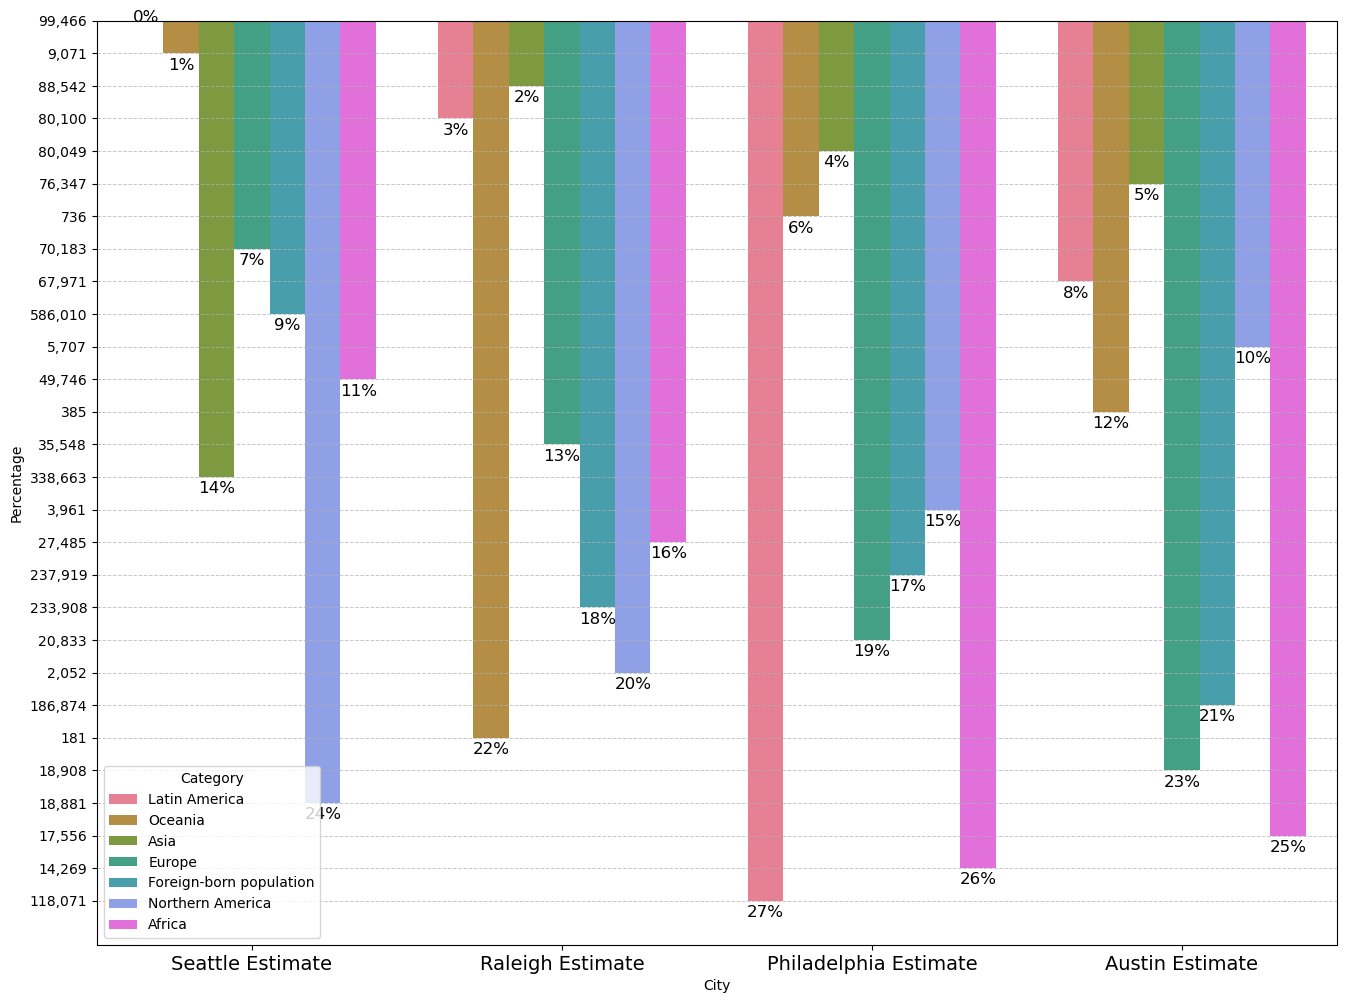

In [179]:
region_of_birth_graphs= pd.melt(region_of_birth_transposed, id_vars='City',var_name='Category', value_name='Percentage')


plt.figure(figsize=(16, 12))

#color Palette for graphs
#colors = {
         #   'Drove Themselves':'#f2a291',
         #   'Public transportation':'#dbb6b5',
         #   'Worked from home':'#f8e3dc',
         #   'Other Means':'#90a3b4'
#}
#color_palette = list(colors.values())

#sns.set_palette(color_palette)


ax=sns.barplot(data=region_of_birth_graphs.sort_values('Percentage', ascending=False), x='City', y='Percentage', hue='Category')



for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.0f}%' for val in container.datavalues], padding=3, fontsize=12) 


cities = region_of_birth_transposed['City']
x = range(len(cities))  

ax.set_xticks(x)
ax.set_xticklabels(cities, fontsize=14)


ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

#plt.title('Average Monthly Utility Bills', fontsize=18)
#plt.ylabel('Amount',fontsize=18)
#plt.xlabel('State',fontsize=18)
#plt.legend(title='Utility Bill', title_fontsize=13, fontsize=13)
#plt.tight_layout()

#plt.ylim(bottom=0, top=175)



plt.show()

In [180]:
mycity_language= seattle_language.merge(raleigh_language, on='Language').merge(philadelphia_language, on='Language'). merge(austin_language, on='Language')

mycity_language.head(100)

,Language,Seattle Estimate,Seattle Margin of Error,Seattle Percent,Seattle Percent Margin of Error,Raleigh Estimate,Raleigh Margin of Error,Raleigh Percent,Raleigh Percent Margin of Error,Philadelphia Estimate,Philadelphia Margin of Error,Philadelphia Percent,Philadelphia Percent Margin of Error,Austin Estimate,Austin Margin of Error,Austin Percent,Austin Percent Margin of Error
0,Population 5 years and over,"2,156,941",*****,"2,156,941",(X),"1,122,715",±163,"1,122,715",(X),"1,460,109",±186,"1,460,109",(X),"1,261,611",±245,"1,261,611",(X)
1,English only,"1,493,083","±18,684",69.2%,±0.9,"900,942","±9,201",80.2%,±0.8,"1,097,615","±13,949",75.2%,±1.0,"878,014","±12,826",69.6%,±1.0
2,Language other than English,"663,858","±18,684",30.8%,±0.9,"221,773","±9,185",19.8%,±0.8,"362,494","±13,977",24.8%,±1.0,"383,597","±12,812",30.4%,±1.0
3,"Speak English less than ""very well""","237,921","±10,043",11.0%,±0.5,"70,689","±5,220",6.3%,±0.5,"165,488","±10,132",11.3%,±0.7,"121,377","±11,553",9.6%,±0.9
4,"Speak English less than ""very well""","237,921","±10,043",11.0%,±0.5,"70,689","±5,220",6.3%,±0.5,"165,488","±10,132",11.3%,±0.7,"92,422","±9,868",7.3%,±0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Speak English less than ""very well""","237,921","±10,043",11.0%,±0.5,"17,951","±3,136",1.6%,±0.3,"47,559","±3,480",3.3%,±0.2,"8,407","±2,724",0.7%,±0.2
96,"Speak English less than ""very well""","237,921","±10,043",11.0%,±0.5,"17,951","±3,136",1.6%,±0.3,"47,559","±3,480",3.3%,±0.2,"17,746","±3,499",1.4%,±0.3
97,"Speak English less than ""very well""","237,921","±10,043",11.0%,±0.5,"17,951","±3,136",1.6%,±0.3,"47,559","±3,480",3.3%,±0.2,"2,802","±1,224",0.2%,±0.1
98,"Speak English less than ""very well""","237,921","±10,043",11.0%,±0.5,"17,951","±3,136",1.6%,±0.3,"14,582","±4,251",1.0%,±0.3,"121,377","±11,553",9.6%,±0.9


In [181]:
language_columns = [ 'Language', 'Seattle Estimate', 'Raleigh Estimate','Philadelphia Estimate', 'Austin Estimate']
languages = mycity_language[language_columns]
languages_transposed = languages.T.reset_index()
languages_header  = languages_transposed.iloc[0]
languages_transposed = languages_transposed[1:]
languages_transposed.columns = languages_header
languages_transposed_columns = ['Language',
                                'English only',
                                'Spanish', 
                                'Other Indo-European languages', 
                                'Asian and Pacific Islander languages',
                                'Other languages']

languages_transposed = languages_transposed[languages_transposed_columns]
languages_transposed.columns = ['City',
                                'English only',
                                'Spanish', 
                                'Other Indo-European languages', 
                                'Asian and Pacific Islander languages',
                                'Other languages']

In [182]:
languages_transposed

,City,English only,Spanish,Other Indo-European languages,Asian and Pacific Islander languages,Other languages
1,Seattle Estimate,"1,493,083","154,566","161,566","279,129","68,597"
2,Raleigh Estimate,"900,942","98,142","54,234","49,225","20,172"
3,Philadelphia Estimate,"1,097,615","161,379","85,314","81,037","34,764"
4,Austin Estimate,"878,014","258,333","54,801","54,649","15,814"


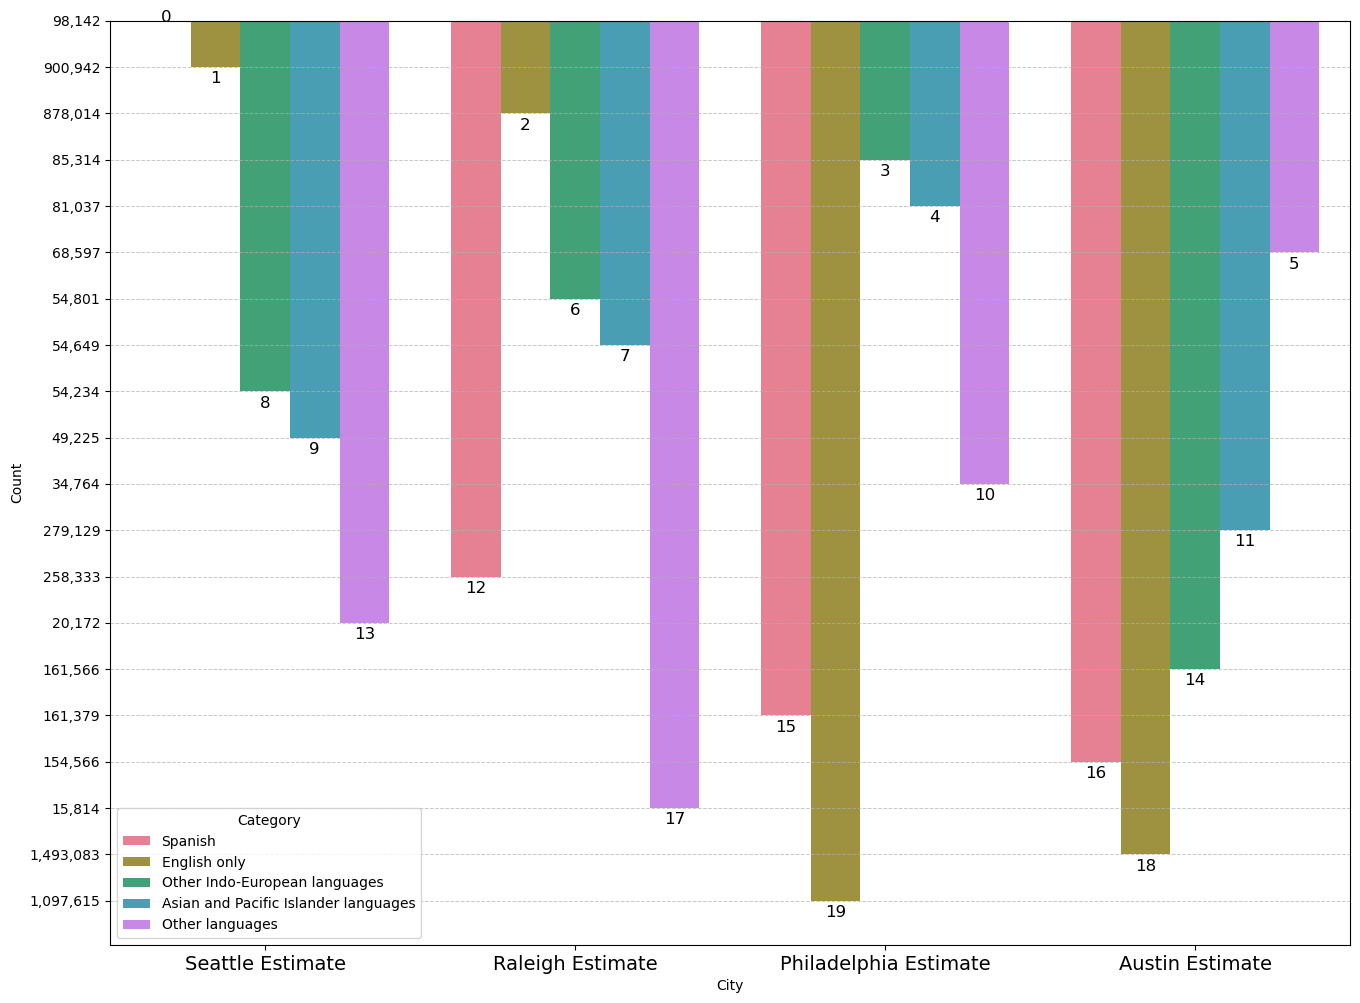

In [183]:
languages_transposed_graphs= pd.melt(languages_transposed, id_vars='City',var_name='Category', value_name='Count')


plt.figure(figsize=(16, 12))

#color Palette for graphs
#colors = {
         #   'Drove Themselves':'#f2a291',
         #   'Public transportation':'#dbb6b5',
         #   'Worked from home':'#f8e3dc',
         #   'Other Means':'#90a3b4'
#}
#color_palette = list(colors.values())

#sns.set_palette(color_palette)


ax=sns.barplot(data=languages_transposed_graphs.sort_values('Count', ascending=False), x='City', y='Count', hue='Category')



for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.0f}' for val in container.datavalues], padding=3, fontsize=12) 


cities = languages_transposed['City']
x = range(len(cities))  

ax.set_xticks(x)
ax.set_xticklabels(cities, fontsize=14)


ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

#plt.title('Average Monthly Utility Bills', fontsize=18)
#plt.ylabel('Amount',fontsize=18)
#plt.xlabel('State',fontsize=18)
#plt.legend(title='Utility Bill', title_fontsize=13, fontsize=13)
#plt.tight_layout()

#plt.ylim(bottom=0, top=175)



plt.show()

In [184]:
mycity_ancestry= seattle_ancestry.merge(raleigh_ancestry, on='Ancestry').merge(philadelphia_ancestry, on='Ancestry'). merge(austin_ancestry, on='Ancestry')

mycity_ancestry.head(100)

,Ancestry,Seattle Estimate,Seattle Margin of Error,Seattle Percent,Seattle Percent Margin of Error,Raleigh Estimate,Raleigh Margin of Error,Raleigh Percent,Raleigh Percent Margin of Error,Philadelphia Estimate,Philadelphia Margin of Error,Philadelphia Percent,Philadelphia Percent Margin of Error,Austin Estimate,Austin Margin of Error,Austin Percent,Austin Percent Margin of Error
0,Total population,"2,271,380",*****,"2,271,380",(X),"1,190,275",*****,"1,190,275",(X),"1,550,542",*****,"1,550,542",(X),"1,334,961",*****,"1,334,961",(X)
1,American,"63,270","±6,379",2.8%,±0.3,"67,915","±8,325",5.7%,±0.7,"34,530","±7,113",2.2%,±0.5,"39,978","±5,450",3.00%,±0.4
2,Arab,"20,116","±5,169",0.9%,±0.2,"15,697","±4,725",1.3%,±0.4,"10,283","±3,222",0.7%,±0.2,"11,225","±2,622",0.80%,±0.2
3,Czech,"8,347","±1,788",0.4%,±0.1,"3,071","±1,049",0.3%,±0.1,"1,962",±722,0.1%,±0.1,"12,267","±2,474",0.90%,±0.2
4,Danish,"15,072","±2,493",0.7%,±0.1,"3,986","±1,456",0.3%,±0.1,"1,008",±504,0.1%,±0.1,"2,779",±988,0.20%,±0.1
5,Dutch,"25,807","±3,558",1.1%,±0.2,"7,962","±1,701",0.7%,±0.1,"3,378","±1,117",0.2%,±0.1,"7,217","±1,685",0.50%,±0.1
6,English,"238,655","±8,749",10.5%,±0.4,"158,567","±9,829",13.3%,±0.8,"49,139","±4,821",3.2%,±0.3,"146,417","±8,088",11.00%,±0.6
7,French (except Basque),"47,078","±4,737",2.1%,±0.2,"18,351","±2,745",1.5%,±0.2,"10,896","±2,372",0.7%,±0.2,"27,673","±4,483",2.10%,±0.3
8,French Canadian,"8,292","±1,555",0.4%,±0.1,"4,350","±1,696",0.4%,±0.1,"1,873",±761,0.1%,±0.1,"5,225","±1,614",0.40%,±0.1
9,German,"266,408","±10,620",11.7%,±0.5,"125,864","±6,701",10.6%,±0.6,"95,669","±6,752",6.2%,±0.4,"152,797","±9,404",11.40%,±0.7


In [253]:
ancestry_columns = [ 'Ancestry', 'Seattle Estimate', 'Raleigh Estimate','Philadelphia Estimate', 'Austin Estimate']
ancestry =mycity_ancestry[ancestry_columns]



#languages_transposed_columns = ['Language',
#                                'English only',
#                                'Spanish', 
#                                'Other Indo-European languages', 
#                                'Asian and Pacific Islander languages',
#                                'Other languages']

#languages_transposed = languages_transposed[languages_transposed_columns]
#languages_transposed.columns = ['City',
#                                'English only',
#                                'Spanish', 
#                                'Other Indo-European languages', 
#                                'Asian and Pacific Islander languages',
 #                               'Other languages']




ancestry_t = ancestry['Ancestry'].value_counts()
ancestry_t

Ancestry
Total population                                  1
American                                          1
Welsh                                             1
Ukrainian                                         1
Swiss                                             1
Swedish                                           1
Subsaharan African                                1
Slovak                                            1
Scottish                                          1
Scotch-Irish                                      1
Russian                                           1
Portuguese                                        1
Polish                                            1
Norwegian                                         1
Lithuanian                                        1
Italian                                           1
Irish                                             1
Hungarian                                         1
Greek                                             1
Ger

In [255]:
european_countries = ['Welsh', 'Ukrainian', 'Swiss', 'Swedish', 'Slovak','Scottish', 'Scotch-Irish', 'Russian', 'Portuguese',
                      'Polish', 'Norwegian', 'Lithuanian', 'Irish','Italian', 'Hungarian', 'Greek', 'German', 'French (except Basque)', 'English',
                      'Dutch',  'Danish', 'Czech']
arab = ['Arab']
west_indian = ['West Indian (excluding Hispanic origin groups)']
north_american = ['French Canadian']
subsaharan_african = ['Subsaharan African']
american = ['American']

In [257]:
ancestry['Country'] = ancestry['Ancestry'].apply(lambda x:'European Country' if x in european_countries
                                                        else 'Arab' if x in arab
                                                        else 'West Indian' if x in west_indian
                                                        else 'North American' if x  in  north_american
                                                        else 'Subsaharan African' if x in subsaharan_african 
                                                        else 'American' if x in american
                                                        else 'Total population')
   

ancestry

,Ancestry,Seattle Estimate,Raleigh Estimate,Philadelphia Estimate,Austin Estimate,Country
0,Total population,"2,271,380","1,190,275","1,550,542","1,334,961",Total population
1,American,"63,270","67,915","34,530","39,978",American
2,Arab,"20,116","15,697","10,283","11,225",Arab
3,Czech,"8,347","3,071","1,962","12,267",European Country
4,Danish,"15,072","3,986","1,008","2,779",European Country
5,Dutch,"25,807","7,962","3,378","7,217",European Country
6,English,"238,655","158,567","49,139","146,417",European Country
7,French (except Basque),"47,078","18,351","10,896","27,673",European Country
8,French Canadian,"8,292","4,350","1,873","5,225",North American
9,German,"266,408","125,864","95,669","152,797",European Country


In [273]:
ancestry_numbers = ['Seattle Estimate',	'Raleigh Estimate',	'Philadelphia Estimate', 'Austin Estimate']	
ancestry[ancestry_numbers]= ancestry[ancestry_numbers].replace({',': ''}, regex=True)
ancestry[ancestry_numbers] = ancestry[ancestry_numbers].astype(int)

In [309]:
ancestry_county = ancestry.groupby('Country')[['Seattle Estimate',
                                               'Raleigh Estimate',
                                               'Philadelphia Estimate',
                                               'Austin Estimate']].sum().sort_values(by ='Seattle Estimate',
                                                                                     ascending=False).reset_index()
ancestry_county

,Country,Seattle Estimate,Raleigh Estimate,Philadelphia Estimate,Austin Estimate
0,Total population,2271380,1190275,1550542,1334961
1,European Country,1223468,614927,546923,633302
2,Subsaharan African,65327,20746,36106,24607
3,American,63270,67915,34530,39978
4,Arab,20116,15697,10283,11225
5,North American,8292,4350,1873,5225
6,West Indian,4863,9274,35737,4958


In [325]:
ancestry_county_transposed = ancestry_county.T.reset_index()
ancestry_county_header  = ancestry_county_transposed.iloc[0]
ancestry_county_transposed = ancestry_county_transposed[1:]
ancestry_county_transposed.columns = ancestry_county_header


ancestry_county_transposed = ancestry_county_transposed.rename(columns={'Country': 'City'})
ancestry_county_transposed

,City,Total population,European Country,Subsaharan African,American,Arab,North American,West Indian
1,Seattle Estimate,2271380,1223468,65327,63270,20116,8292,4863
2,Raleigh Estimate,1190275,614927,20746,67915,15697,4350,9274
3,Philadelphia Estimate,1550542,546923,36106,34530,10283,1873,35737
4,Austin Estimate,1334961,633302,24607,39978,11225,5225,4958


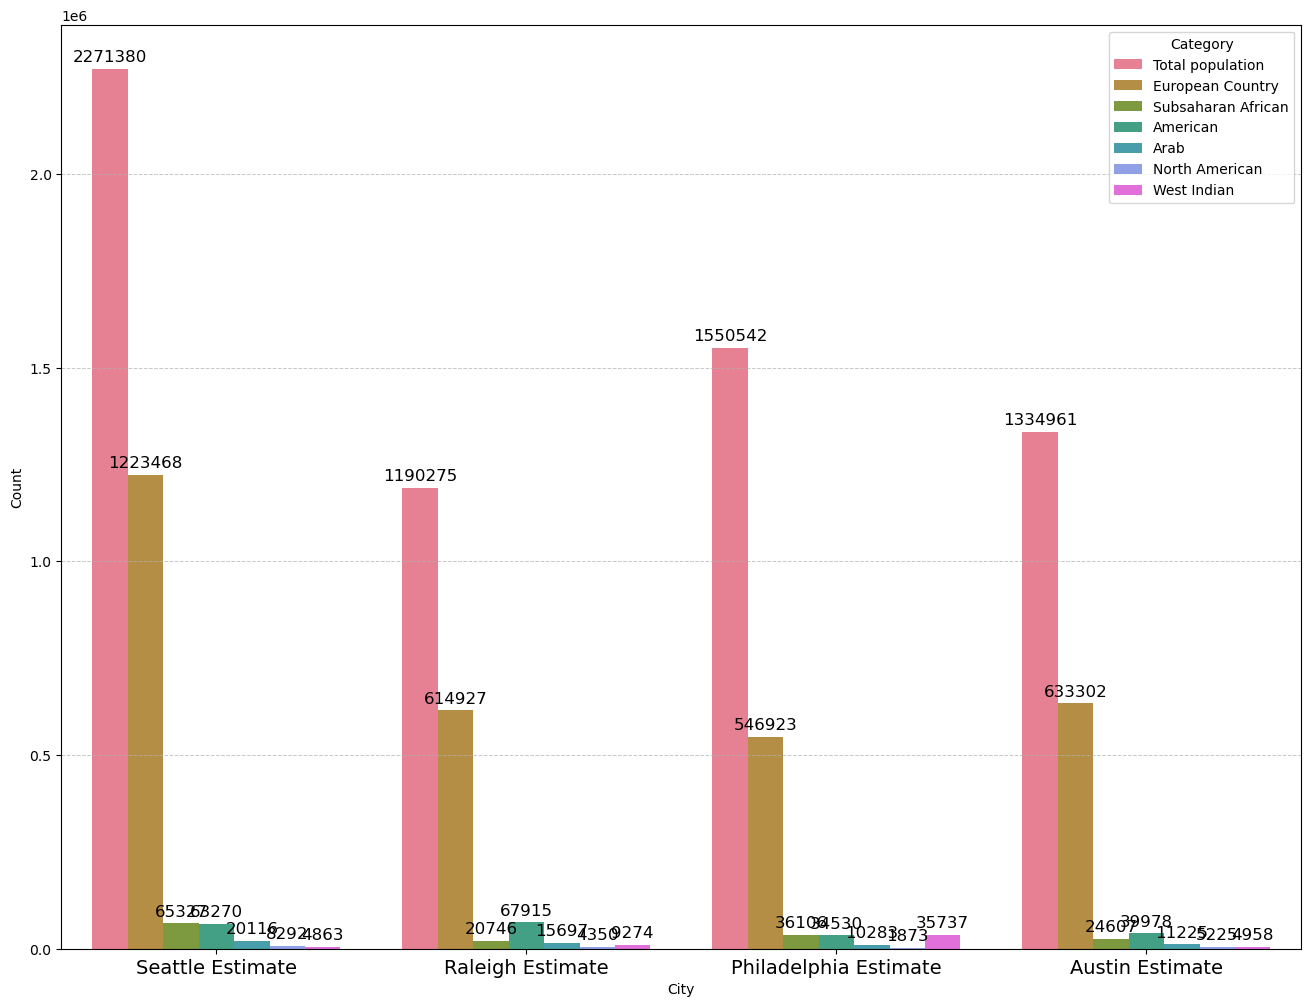

In [327]:
ancestry_county_graph = pd.melt(ancestry_county_transposed , id_vars='City',var_name='Category', value_name='Count')


plt.figure(figsize=(16, 12))

#color Palette for graphs
#colors = {
         #   'Drove Themselves':'#f2a291',
         #   'Public transportation':'#dbb6b5',
         #   'Worked from home':'#f8e3dc',
         #   'Other Means':'#90a3b4'
#}
#color_palette = list(colors.values())

#sns.set_palette(color_palette)


ax=sns.barplot(data=ancestry_county_graph, x='City', y='Count', hue='Category')



for container in ax.containers:
    ax.bar_label(container, labels=[f'{val:.0f}' for val in container.datavalues], padding=3, fontsize=12) 


cities = ancestry_county_transposed['City']
x = range(len(cities))  

ax.set_xticks(x)
ax.set_xticklabels(cities, fontsize=14)


ax.yaxis.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

#plt.title('Average Monthly Utility Bills', fontsize=18)
#plt.ylabel('Amount',fontsize=18)
#plt.xlabel('State',fontsize=18)
#plt.legend(title='Utility Bill', title_fontsize=13, fontsize=13)
#plt.tight_layout()

#plt.ylim(bottom=0, top=175)



plt.show()